In [ ]:
!wget "https://www.dropbox.com/scl/fo/hlujog78gi4zy8duy683h/AF-i2zym-HVnaEKJe4MhEv4?rlkey=tzdr361wsqcr1oda3vrfmypcf&dl=1" -O dropbox_folder.zip
!unzip dropbox_folder.zip -d extracted_data/

--2025-08-12 22:13:19--  https://www.dropbox.com/scl/fo/hlujog78gi4zy8duy683h/AF-i2zym-HVnaEKJe4MhEv4?rlkey=tzdr361wsqcr1oda3vrfmypcf&dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd85187adb0dff652d9d3d95034.dl.dropboxusercontent.com/zip_download_get/CStehVHs2_raEaa8hlKV-0XEAbQPQeT8tn8w-B1kE46g0tQwAklJE67lw69fmBTvSmroK11cLnTGbS3hatQmNIbbWcpbNch5_A2AfVvL6JdcGg# [following]
--2025-08-12 22:13:20--  https://ucd85187adb0dff652d9d3d95034.dl.dropboxusercontent.com/zip_download_get/CStehVHs2_raEaa8hlKV-0XEAbQPQeT8tn8w-B1kE46g0tQwAklJE67lw69fmBTvSmroK11cLnTGbS3hatQmNIbbWcpbNch5_A2AfVvL6JdcGg
Resolving ucd85187adb0dff652d9d3d95034.dl.dropboxusercontent.com (ucd85187adb0dff652d9d3d95034.dl.dropboxusercontent.com)... 162.125.65.15, 2620:100:6021:15::a27d:410f
Connecting to ucd85187adb0dff652d9d3d95034

##Initialize

In [ ]:
import pandas as pd
cds_allNo=pd.read_parquet('/content/extracted_data/MergedData/cds_all_Nofilter.parquet')
merged = pd.read_parquet("/content/extracted_data/MergedData/IndALL_2015_2016.parquet")

In [ ]:
family2016= pd.read_excel('/content/extracted_data/FamilyData/family_2015.xlsx')
parents2016=merged[merged['year']==2016]
parents2016=parents2016.merge(family2016,left_on='ER34301',right_on='ER60002',how='left')


In [ ]:
'''a2016=pd.read_excel('/content/extracted_data/RawData/Indiv2016.xlsx')
a2015=pd.read_excel('/content/extracted_data/RawData/Indiv2015.xlsx')
both=pd.merge(a2015,a2016,on=['ER34301','ER34302','ER30001','ER30002','ER32000','ER32006'],how='inner')
merged=merged[merged['year']!=2016]
both['year']=2016
both.rename(columns={'ER30001': 'Perm_FID', 'ER30002': 'Perm_IID'},inplace=True)

merged=pd.concat([merged,both],ignore_index=True)
merged.to_parquet('IndALL_2015_2016.parquet')'''

"a2016=pd.read_excel('/content/extracted_data/RawData/Indiv2016.xlsx')\na2015=pd.read_excel('/content/extracted_data/RawData/Indiv2015.xlsx')\nboth=pd.merge(a2015,a2016,on=['ER34301','ER34302','ER30001','ER30002','ER32000','ER32006'],how='inner')\nmerged=merged[merged['year']!=2016]\nboth['year']=2016\nboth.rename(columns={'ER30001': 'Perm_FID', 'ER30002': 'Perm_IID'},inplace=True)\n\nmerged=pd.concat([merged,both],ignore_index=True)\nmerged.to_parquet('IndALL_2015_2016.parquet')"

In [ ]:
# @title Default title text
child=set(cds_allNo[cds_allNo['year']==2014]['ER34201'])
parents= pd.merge(merged[merged['year']==2013], parents2016, on=['Perm_FID','Perm_IID'], how='inner',    suffixes=('_2013', '_2016')
)
parents.rename(columns={'ER34201_2016': 'ER342011', 'ER34202_2016': 'ER342022','ER34201_2013': 'ER34201', 'ER34202_2013': 'ER34202'},inplace=True)
filtered_parents = parents[parents['ER34201'].isin(child)].copy()
fmily= set(parents['ER34201'])

In [ ]:
child97=set(cds_allNo[cds_allNo['year']==1997]['ER33401'])
parents97= pd.merge(merged[merged['year']==1997], parents2016, on=['Perm_FID','Perm_IID'], how='inner',    suffixes=('_2013', '_2016')
)
parents97.rename(columns={'ER33401_2016': 'ER334011', 'ER33402_2016': 'ER334022','ER33401_2013': 'ER33401', 'ER33402_2013': 'ER33402'},inplace=True)
filtered_parents97 = parents97[parents97['ER33401'].isin(child97)].copy()
fmily97= set(parents97['ER33401'])

In [ ]:
child02=set(cds_allNo[cds_allNo['year']==2002]['ER33601'])
parents02= pd.merge(merged[merged['year']==2001], parents2016, on=['Perm_FID','Perm_IID'], how='inner',    suffixes=('_2013', '_2016')
)
#ER33601
parents02.rename(columns={'ER33601_2016': 'ER342011', 'ER32602_2016': 'ER342022','ER33601_2013': 'ER33601', 'ER33602_2013': 'ER33602'},inplace=True)
filtered_parents02 = parents02[parents02['ER33601'].isin(child)].copy()
fmily02= set(parents02['ER33601'])

In [ ]:
child2007=set(cds_allNo[cds_allNo['year']==2007]['ER34701'])
parents2007= pd.merge(merged[merged['year']==2007], parents2016, on=['Perm_FID','Perm_IID'], how='inner',    suffixes=('_2007', '_2016'))
parents2007.rename(columns={'ER33901_2016': 'ER339011', 'ER33901_2007': 'ER33901', 'ER33902_2016': 'ER33902', 'ER333902_2007': 'ER33902'},inplace=True)
filtered_parents2007 = parents2007[parents2007['ER33901'].isin(child2007)].copy()
fmily2007= set(parents2007['ER33901'])

In [ ]:
child2019=set(cds_allNo[cds_allNo['year']==2019]['ER34701'])

parents2019= pd.merge(merged[merged['year']==2019], parents2016, on=['Perm_FID','Perm_IID'], how='inner',    suffixes=('_2019', '_2016')
)
parents2019.rename(columns={'ER34701_2016': 'ER342011', 'ER34702_2016': 'ER342022','ER34701_2019': 'ER34701', 'ER34702_2019': 'ER34702'},inplace=True)
filtered_parents2019 = parents2019[parents2019['ER34701'].isin(child)].copy()
fmily= set(parents2019['ER34701'])

In [ ]:
cds_allNo.rename(columns={'ER30001': 'Perm_FID', 'ER30002': 'Perm_IID'},inplace=True)
children= pd.merge(cds_allNo[cds_allNo['year']==2014], merged[merged['year']==2013], on=['ER34201','ER34202'], how='right')
children2019= pd.merge(cds_allNo[cds_allNo['year']==2019], merged[merged['year']==2019], on=['ER34701','ER34702'], how='right')
children2007= pd.merge(cds_allNo[cds_allNo['year']==2007], merged[merged['year']==2007], on=['ER33901','ER33902'], how='right')
children2002= pd.merge(cds_allNo[cds_allNo['year']==2002], merged[merged['year']==2001], on=['ER33601','ER33602'], how='right')
chidlren1997= pd.merge(cds_allNo[cds_allNo['year']==1997], merged[merged['year']==1997], on=['ER33401','ER33402'], how='right')

In [ ]:
filtered_children = cds_allNo[cds_allNo['ER34201'].isin(fmily)].copy()

filtered_children2019 = cds_allNo[cds_allNo['ER34701'].isin(fmily)].copy()
filtered_children2007 = cds_allNo[cds_allNo['ER33901'].isin(fmily2007)].copy()
filtered_children2002 = cds_allNo[cds_allNo['ER33601'].isin(fmily02)].copy()
filtered_children1997 = cds_allNo[cds_allNo['ER33401'].isin(fmily97)].copy()

In [ ]:
filtered_children_parents = pd.concat([filtered_children, filtered_parents], ignore_index=True)
filtered_children_parents2019 = pd.concat([filtered_children2019, filtered_parents2019], ignore_index=True)
filtered_children_parents2007 = pd.concat([filtered_children2007, filtered_parents2007], ignore_index=True)
filtered_children_parents2002 = pd.concat([filtered_children2002, filtered_parents02], ignore_index=True)
filtered_children_parents1997 = pd.concat([filtered_children1997, filtered_parents97], ignore_index=True)

In [ ]:
childrenAnswered=filtered_children_parents[filtered_children_parents['A14APW'].notnull()]
childrenAnswered = childrenAnswered[childrenAnswered['A14APW']!=999]
parentsAnswered=filtered_children_parents[filtered_children_parents['WB16K1_2016'].notnull()]
parentsAnswered = parents[parents['ER34201'].isin(set(childrenAnswered['ER34201']))].copy()
parentsAnswered = parentsAnswered[parentsAnswered['WB16K1_2016']!=9]


In [ ]:
childrenAnswered2007=filtered_children_parents2007[filtered_children_parents2007['Q34APSS'].notnull()]
childrenAnswered2007 = childrenAnswered2007[childrenAnswered2007['Q34APSS']!=999]
parentsAnswered2007=filtered_children_parents2007[filtered_children_parents2007['WB16K1_2016'].notnull()]
parentsAnswered2007 = parents2007[parents2007['ER33901'].isin(set(childrenAnswered2007['ER33901']))].copy()
parentsAnswered2007 = parentsAnswered2007[parentsAnswered2007['WB16K1_2016']!=9]

In [ ]:

childrenAnswered2002=filtered_children_parents2002[filtered_children_parents2002['Q24APSS'].notnull()]
childrenAnswered2002 = childrenAnswered2002[childrenAnswered2002['Q24APSS']!=999]
parentsAnswered2002=filtered_children_parents2002[filtered_children_parents2002['WB16K1_2016'].notnull()]
parentsAnswered2002 = parents02[parents02['ER33601'].isin(set(childrenAnswered2002['ER33601']))].copy()
parentsAnswered2002 = parentsAnswered2002[parentsAnswered2002['WB16K1_2016']!=9]

In [ ]:
childrenAnswered1997=filtered_children_parents1997[filtered_children_parents1997['Q3APW'].notnull()]
childrenAnswered1997 = childrenAnswered1997[childrenAnswered1997['Q3APW']!=999]
parentsAnswered1997=filtered_children_parents1997[filtered_children_parents1997['WB16K1_2016'].notnull()]
parentsAnswered1997 = parents97[parents97['ER33401'].isin(set(childrenAnswered1997['ER33401']))].copy()
parentsAnswered1997 = parentsAnswered1997[parentsAnswered1997['WB16K1_2016']!=9]

In [ ]:
childrenAnswered2019=filtered_children_parents2019[filtered_children_parents2019['A19APW'].notnull()]
childrenAnswered2019 = childrenAnswered2019[childrenAnswered2019['A19APW']!=999]
parentsAnswered2019=filtered_children_parents2019[filtered_children_parents2019['WB16K1_2016'].notnull()]
parentsAnswered2019 = parents2019[parents2019['ER34701'].isin(set(childrenAnswered2019['ER34701']))].copy()
parentsAnswered2019 = parentsAnswered2019[parentsAnswered2019['WB16K1_2016']!=9]


del merged

#Analysis

**Total number of children that appear in both surveys is 243**

In [ ]:
parents2016['both']=list(zip(parents2016['Perm_FID'],parents2016['Perm_IID']))


In [ ]:
cds_allNo['both']=list(zip(cds_allNo['Perm_FID'],cds_allNo['Perm_IID']))

In [ ]:
both=set(cds_allNo['both'])&set(parents2016['both'])

In [ ]:
cds_allNo['check'] = list(zip(cds_allNo['Perm_FID'], cds_allNo['Perm_IID']))


In [ ]:
# Group by FID and IID, then count how many unique years they appear in
overlap = cds_allNo.groupby(['Perm_FID', 'Perm_IID'])['year'].nunique()

# Filter to only those who appear in more than one year
overlapping_people = overlap[overlap > 1].reset_index()

print(f"Number of individuals who appear in multiple years: {len(overlapping_people)}")
print(overlapping_people.head())


Number of individuals who appear in multiple years: 5374
   Perm_FID  Perm_IID  year
0         4        39     3
1         4        41     3
2         4        42     3
3         4        48     2
4         4       187     2


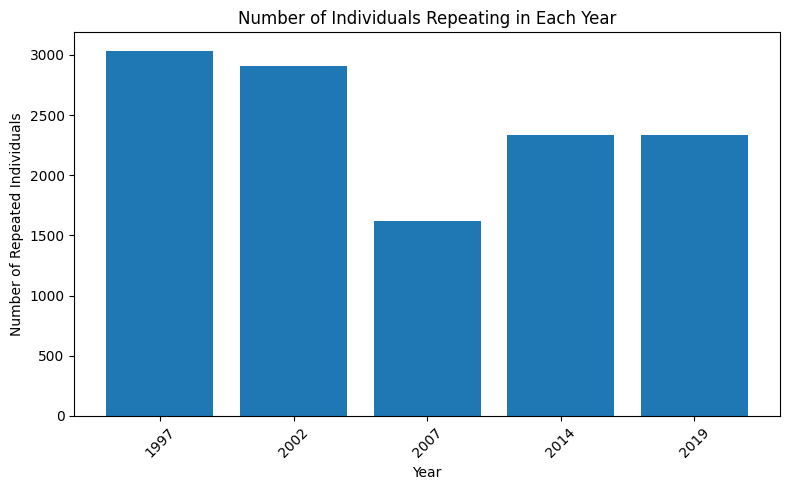

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Count how many years each person appears in
repeat_counts = cds_allNo.groupby(['Perm_FID', 'Perm_IID'])['year'].nunique()

# Step 2: Keep only people who appear in multiple years
repeated_ids = repeat_counts[repeat_counts > 1].index

# Step 3: Filter original DataFrame to include only repeated individuals
cds_allNo['check'] = list(zip(cds_allNo['Perm_FID'], cds_allNo['Perm_IID']))
repeated_rows = cds_allNo[cds_allNo['check'].isin(repeated_ids)]

# Step 4: Count how many of these repeated individuals appear in each year
yearly_counts = repeated_rows['year'].value_counts().sort_index()

# Step 5: Plot
plt.figure(figsize=(8, 5))
plt.bar(yearly_counts.index.astype(str), yearly_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Repeated Individuals')
plt.title('Number of Individuals Repeating in Each Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



**This chart shows how many individuals appeared in each survey year. A total of 12,242 individuals participated in more than one year.

Note: While children may appear across multiple waves, they do not retake the assessment in each wave — their test scores are only recorded once. The repeated counts reflect their presence, not re-testing.**

##1997 Study

**“Individuals who were tested in the assessment as children in 1997 and participated in the survey again in 2016 as adults.”**



In [ ]:
# Step 1: 1997 children ER33401
cds_1997 = cds_allNo[cds_allNo['year'] == 1997]

children_1997 = cds_1997.loc[
    cds_1997['Q3AP_SS'].notnull(),  # child test score exists
    ['Perm_FID', 'Perm_IID','Q3AP_SS',]
].drop_duplicates()

children_1997.rename(columns={'ER30001': 'Perm_FID', 'ER30002': 'Perm_IID'}, inplace=True)

print(f"Children in 1997: {len(children_1997)}")

# Step 2: 2016 parents
parents_2016 = parents2016.copy()

# Rename columns if not yet done
if 'Perm_FID' not in parents_2016.columns or 'Perm_IID' not in parents_2016.columns:
    parents_2016.rename(columns={'ER30001': 'Perm_FID', 'ER30002': 'Perm_IID'}, inplace=True)

# Filter to only real parents: answered at least Q1 and not coded as missing
parents_2016 = parents_2016.loc[
    (parents_2016['WB16K1'].notnull()) &
    (parents_2016['WB16K1'] != 9) &
    (parents_2016['WB16K1'] != 999)
].drop_duplicates()

print(f"Parents in 2016 (filtered): {len(parents_2016)}")

# Optional: check role code if available
if 'REL' in parents_2016.columns:
    parents_2016 = parents_2016[parents_2016['REL'].isin([20, 22])]  # e.g. 20 = Head, 22 = spouse/partner
    print(f"Filtered parents with REL=20/22: {len(parents_2016)}")

# Step 3: merge
both_child_parent = pd.merge(
    children_1997,
    parents_2016,
    on=['Perm_FID', 'Perm_IID'],
    how='inner'
)

print("Number of individuals who were children in 1997 and parents in 2016:", len(both_child_parent))



Children in 1997: 2223
Parents in 2016 (filtered): 8226
Number of individuals who were children in 1997 and parents in 2016: 199


**Around 200 individuals who were tested as children in the 1997 CDS were observed as parents in the 2016 CDS.**

In [ ]:
childrenAnswered1997['both']=list(zip(childrenAnswered1997['Perm_FID'],childrenAnswered1997['Perm_IID']))
parentsAnswered1997['both']=list(zip(parentsAnswered1997['Perm_FID'],parentsAnswered1997['Perm_IID']))

both=set(childrenAnswered1997['both'])&set(parentsAnswered1997['both'])

/tmp/ipython-input-4230508407.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  childrenAnswered1997['both']=list(zip(childrenAnswered1997['Perm_FID'],childrenAnswered1997['Perm_IID']))


In [ ]:
id,d= zip(*both)

In [ ]:
childrenAnswered19971=childrenAnswered1997[childrenAnswered1997['both'].isin(both)]
parentsAnswered19971=parentsAnswered1997[parentsAnswered1997['both'].isin(both)]

In [ ]:
merged=pd.merge(childrenAnswered19971,parentsAnswered19971,on=['both','ER33401'],how='inner',suffixes=('CC', 'PC'))

In [ ]:
z=set(childrenAnswered19971['ER33401'])

In [ ]:
parentsAnswered1997=parentsAnswered1997[parentsAnswered1997['ER33401'].isin(z)]

In [ ]:
child971 = parentsAnswered1997[parentsAnswered1997['ER33403_2013'].isin([30])]
parentsofthem = parentsAnswered1997[parentsAnswered1997['ER33403_2013'].isin([10, 20,22])]


In [ ]:
merged=pd.merge(merged,parentsofthem,on=['ER33401'],how='inner',suffixes=('C', 'P'))

In [ ]:
import statsmodels.api as sm
#A19MRSS q_cols
q_cols = [
    'WB16K1_2016', 'WB16K2_2016', 'WB16K3_2016',
    'WB16K4_2016', 'WB16K5_2016', 'WB16K6_2016'
]
merged['parent_Q'] = merged[q_cols].apply(
    lambda row: sum(row == 1), axis=1
)
q_cols  =[x +'PC' for x in q_cols]
merged['child_Q'] = merged[q_cols].apply(
    lambda row: sum(row == 1), axis=1)

# 4. Prepare predictors list
pred1=[ 'parent_Q','parents_income','parent_edu','childFutureEdu',
       'Q3AP_SS','child_gender','parents_exp','child_exp']

# 6. Clean
merged = merged[~merged['Q3AP_SS'].isin([999, 0, 995, 996])]

# 7. Rename
merged.rename(columns={'ER34349_2016':'parent_edu','ER65448B':'parents_exp','ER65448BPC':'child_exp',
'ER34349_2016PC':'childFutureEdu','ER32000_2013PC':'child_gender','ER65349':'parents_income','ER65349PC':'child_income'}, inplace=True)
# 8. Fit model
y = merged['child_Q']
x = merged[pred1]
X = sm.add_constant(x)
model = sm.OLS(y, X)
results = model.fit()

# 9. Print summary
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                child_Q   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     22.84
Date:                Tue, 12 Aug 2025   Prob (F-statistic):           1.03e-24
Time:                        22:15:16   Log-Likelihood:                -284.93
No. Observations:                 212   AIC:                             587.9
Df Residuals:                     203   BIC:                             618.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.2333      0.664     -1.

**in 1997 there exists 198 that took appear as parents in 2016 there exists 206 parents for them in the survey there is also about 281 indivuals who are children to those parents inclduing the 198 that appear in the 1997 survey  **

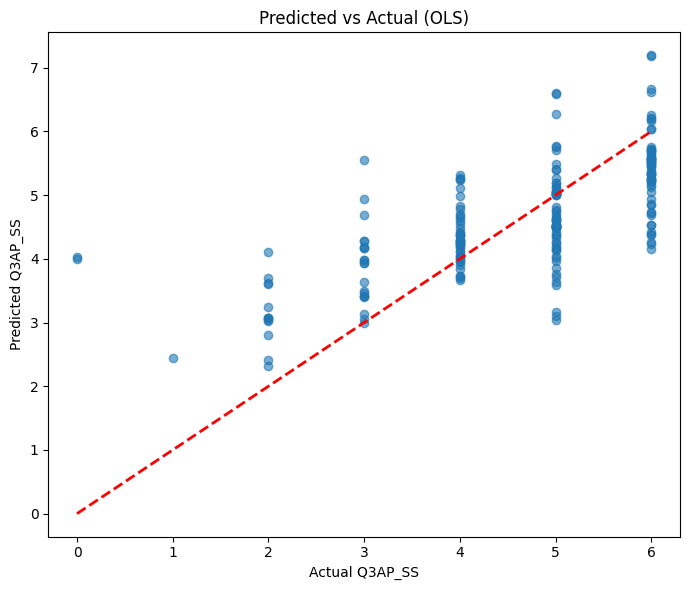

In [ ]:
import matplotlib.pyplot as plt

# Get predictions
y_pred = results.predict(X)

# Plot Predicted vs Actual
plt.figure(figsize=(7, 6))
plt.scatter(y, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)  # perfect fit line
plt.xlabel("Actual Q3AP_SS")
plt.ylabel("Predicted Q3AP_SS")
plt.title("Predicted vs Actual (OLS)")
plt.tight_layout()
plt.show()



Train R²: 0.7824177742004395
Test R²: 0.5606358647346497
Test RMSE: 0.7238352298736572


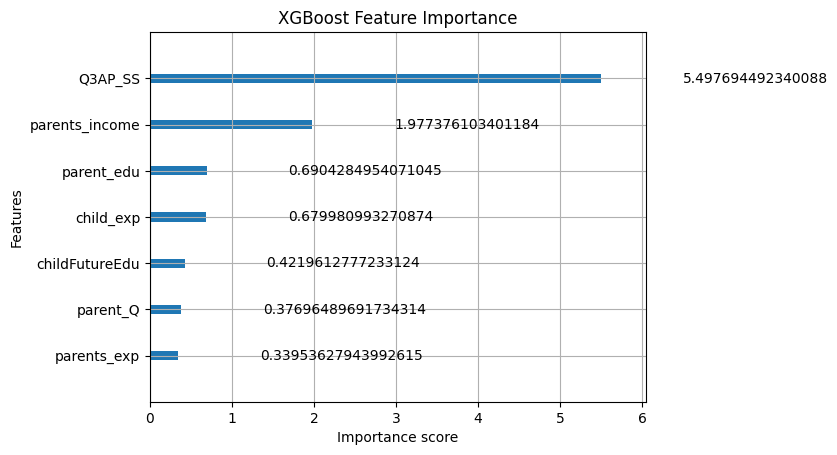

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score


y = merged['child_Q']
x = merged[pred1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Initialize XGBoost Regressor
xgb = XGBRegressor(
    n_estimators=500,      # number of trees
    learning_rate=0.1,    # shrinkage step
    max_depth=1,           # moderate depth
    random_state=42,
)

# Fit model
xgb.fit(x_train, y_train)

# Predictions
y_pred_train = xgb.predict(x_train)
y_pred_test = xgb.predict(x_test)

# Evaluation
print("Train R²:", r2_score(y_train, y_pred_train))
print("Test R²:", r2_score(y_test, y_pred_test))
print("Test RMSE:", mean_squared_error(y_test, y_pred_test))

# Feature Importance Plot
import matplotlib.pyplot as plt
import xgboost as xgb_plot

xgb_plot.plot_importance(xgb, importance_type='gain', title='XGBoost Feature Importance')
plt.show()



In [ ]:
import statsmodels.api as sm
#A19MRSS q_cols
q_cols = [
    'WB16K1_2016', 'WB16K2_2016', 'WB16K3_2016',
    'WB16K4_2016', 'WB16K5_2016', 'WB16K6_2016'
]
merged['parent_Q'] = merged[q_cols].apply(
    lambda row: sum(row == 1), axis=1
)
q_cols  =[x +'PC' for x in q_cols]
merged['child_Q'] = merged[q_cols].apply(
    lambda row: sum(row == 1), axis=1)

# 4. Prepare predictors list
pred1=[ 'parent_Q','parents_income','parent_edu','childFutureEdu',
       'child_Q','child_gender','parents_exp','Q3AP_SS']

# 6. Clean
merged = merged[~merged['Q3AP_SS'].isin([999, 0, 995, 996])]

# 7. Rename
merged.rename(columns={'ER34349_2016':'parent_edu','ER65448B':'parents_exp','ER65448BPC':'child_exp',
'ER34349_2016PC':'childFutureEdu','ER32000_2013PC':'child_gender','ER65349':'parents_income','ER65349PC':'child_income'}, inplace=True)
# 8. Fit model
y = merged['child_income']
x = merged[pred1]
X = sm.add_constant(x)
model = sm.OLS(y, X)
results = model.fit()

# 9. Print summary
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:           child_income   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     8.669
Date:                Tue, 12 Aug 2025   Prob (F-statistic):           3.69e-10
Time:                        22:15:17   Log-Likelihood:                -2598.5
No. Observations:                 212   AIC:                             5215.
Df Residuals:                     203   BIC:                             5245.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.123e+05   3.65e+04     -3.

In [ ]:
merged.ER34305_2016

,ER34305_2016
0,60.0
1,59.0
2,55.0
3,56.0
4,56.0
...,...
208,59.0
209,61.0
210,51.0
211,57.0


Train R²: 0.7089362740516663
Test R²: 0.4501785635948181
Test RMSE: 2117127680.0


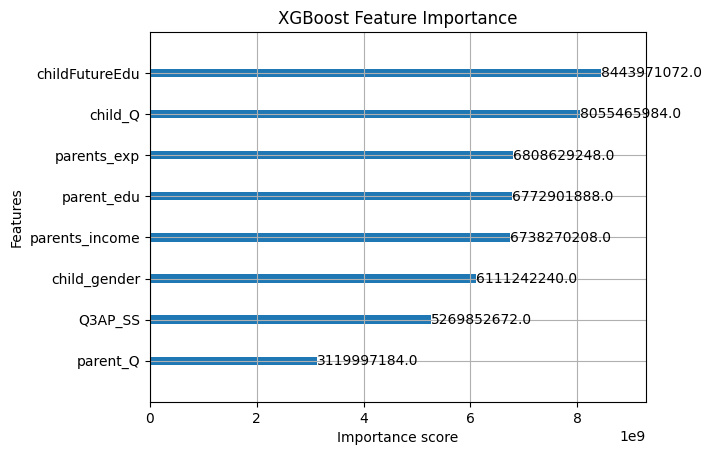

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score


y = merged['child_income']
x = merged[pred1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Initialize XGBoost Regressor
xgb = XGBRegressor(
    n_estimators=100,      # number of trees
    learning_rate=0.1,    # shrinkage step
    max_depth=2,           # moderate depth
    subsample=0.7,         # row sampling
    colsample_bytree=0.7,  # column sampling
    random_state=42,
)

# Fit model
xgb.fit(x_train, y_train)

# Predictions
y_pred_train = xgb.predict(x_train)
y_pred_test = xgb.predict(x_test)

# Evaluation
print("Train R²:", r2_score(y_train, y_pred_train))
print("Test R²:", r2_score(y_test, y_pred_test))
print("Test RMSE:", mean_squared_error(y_test, y_pred_test))

# Feature Importance Plot
import matplotlib.pyplot as plt
import xgboost as xgb_plot

xgb_plot.plot_importance(xgb, importance_type='gain', title='XGBoost Feature Importance')
plt.show()


In [ ]:
import statsmodels.api as sm
#A19MRSS q_cols
q_cols = [
    'WB16K1_2016', 'WB16K2_2016', 'WB16K3_2016',
    'WB16K4_2016', 'WB16K5_2016', 'WB16K6_2016'
]
merged['parent_Q'] = merged[q_cols].apply(
    lambda row: sum(row == 1), axis=1
)
q_cols  =[x +'PC' for x in q_cols]
merged['child_Q'] = merged[q_cols].apply(
    lambda row: sum(row == 1), axis=1)

def wealth(x):
  if x>200000:
    return 4
  elif x>100000:
    return 3
  elif x>20000:
    return 2
  elif x>10000:
    return 1
  else:
    return 0
merged['wealth']=merged['child_income'].apply(wealth)

# 4. Prepare predictors list
pred1=[ 'parent_Q','parents_income','parent_edu','childFutureEdu','child_ageAt2016','parentsAge',
       'child_Q','child_gender','parents_exp','Q3AP_SS']

# 6. Clean
merged = merged[~merged['Q3AP_SS'].isin([999, 0, 995, 996])]

# 7. Rename
merged.rename(columns={'ER34349_2016':'parent_edu','ER65448B':'parents_exp','ER65448BPC':'child_exp','ER34305_2016PC':'child_ageAt2016','ER34305_2016':'parentsAge',
'ER34349_2016PC':'childFutureEdu','ER32000_2013PC':'child_gender','ER65349':'parents_income','ER65349PC':'child_income'}, inplace=True)
# 8. Fit model
y = merged['wealth']
x = merged[pred1]
X = sm.add_constant(x)
model = sm.OLS(y, X)
results = model.fit()

# 9. Print summary
print(results.summary())




                            OLS Regression Results                            
Dep. Variable:                 wealth   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     10.94
Date:                Tue, 12 Aug 2025   Prob (F-statistic):           8.40e-15
Time:                        22:15:18   Log-Likelihood:                -226.44
No. Observations:                 212   AIC:                             474.9
Df Residuals:                     201   BIC:                             511.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -5.8692      2.438     

Train R²: 0.7702154517173767
Test R²: 0.5595309734344482
Test RMSE: 0.3884214162826538


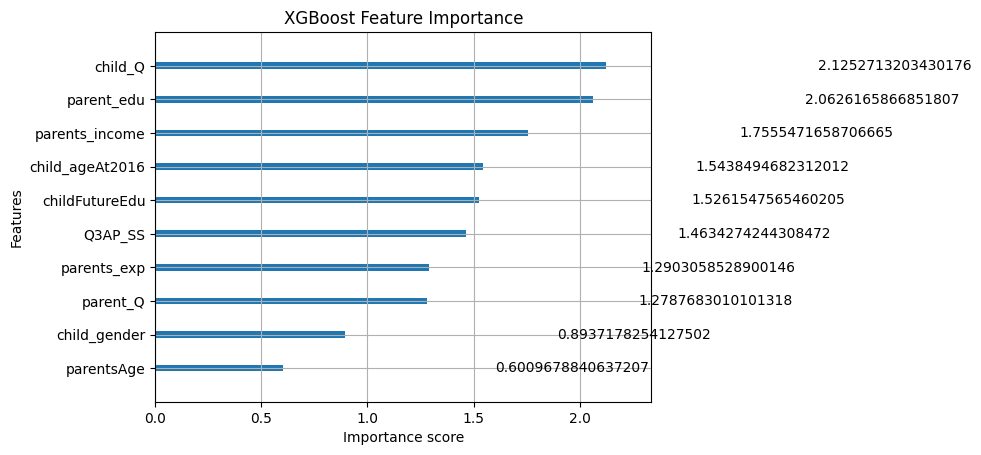

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score


y = merged['wealth']
x = merged[pred1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Initialize XGBoost Regressor
xgb = XGBRegressor(
    n_estimators=100,      # number of trees
    learning_rate=0.1,    # shrinkage step
    max_depth=2,           # moderate depth
    subsample=0.7,         # row sampling
    colsample_bytree=0.7,  # column sampling
    random_state=42,
)

# Fit model
xgb.fit(x_train, y_train)

# Predictions
y_pred_train = xgb.predict(x_train)
y_pred_test = xgb.predict(x_test)

# Evaluation
print("Train R²:", r2_score(y_train, y_pred_train))
print("Test R²:", r2_score(y_test, y_pred_test))
print("Test RMSE:", mean_squared_error(y_test, y_pred_test))

# Feature Importance Plot
import matplotlib.pyplot as plt
import xgboost as xgb_plot

xgb_plot.plot_importance(xgb, importance_type='gain', title='XGBoost Feature Importance')
plt.show()


In [ ]:
import statsmodels.api as sm
#A19MRSS q_cols
q_cols = [
    'WB16K1_2016', 'WB16K2_2016', 'WB16K3_2016',
    'WB16K4_2016', 'WB16K5_2016', 'WB16K6_2016'
]
qcols=q_cols


for col in q_cols:
    merged[col] = merged[col] == 1


merged['parent_Q'] = merged[q_cols].apply(
    lambda row: sum(row == 1), axis=1
)
q_cols  =[x +'PC' for x in q_cols]
merged['child_Q'] = merged[q_cols].apply(
    lambda row: sum(row == 1), axis=1)

for col in q_cols:
    merged[col] = merged[col] == 1
qcols+=q_cols

merged[qcols]=merged[qcols].astype(float)

def wealth(x):
  if x>200000:
    return 4
  elif x>100000:
    return 3
  elif x>20000:
    return 2
  elif x>10000:
    return 1
  else:
    return 0
merged['wealth']=merged['child_income'].apply(wealth)

# 4. Prepare predictors list
pred1=qcols+['parents_income','parent_edu','childFutureEdu','testCube','testSquared','testTimesEXP','child_ageAt2016','parentsAge'
       ,'child_gender','parents_exp','Q3AP_SS']

# 6. Clean
merged = merged[~merged['Q3AP_SS'].isin([999, 0, 995, 996])]

# 7. Rename
merged.rename(columns={'ER34349_2016':'parent_edu','ER65448B':'parents_exp','ER65448BPC':'child_exp','ER34305_2016PC':'child_ageAt2016','ER34305_2016':'parentsAge',
'ER34349_2016PC':'childFutureEdu','ER32000_2013PC':'child_gender','ER65349':'parents_income','ER65349PC':'child_income'}, inplace=True)
# 8. Fit model
#interaction and squared values
merged['testSquared']=merged['Q3AP_SS']**2
merged['testCube']=merged['Q3AP_SS']**3
merged['testTimesEXP']=merged['Q3AP_SS']*merged['parents_exp']
y = merged['wealth']
x = merged[pred1]
X = sm.add_constant(x)
model = sm.OLS(y, X)
results = model.fit()

# 9. Print summary
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                 wealth   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     6.705
Date:                Tue, 12 Aug 2025   Prob (F-statistic):           7.67e-15
Time:                        22:15:18   Log-Likelihood:                -209.01
No. Observations:                 212   AIC:                             466.0
Df Residuals:                     188   BIC:                             546.6
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -36.5770     10.129     

Train R²: 0.9977074861526489
Test R²: 0.5890634059906006
Test RMSE: 0.36237868666648865


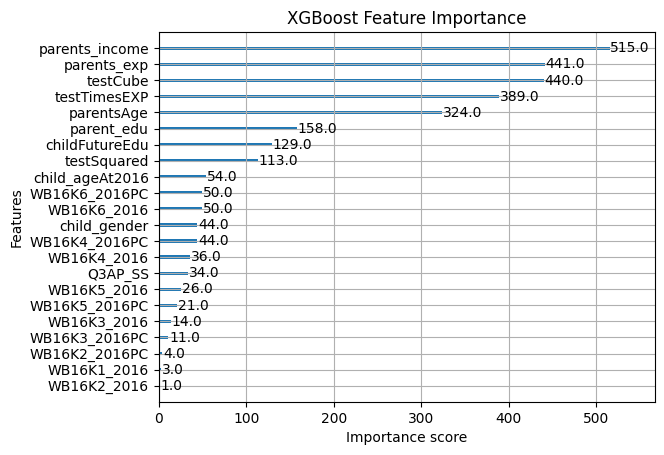

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score


y = merged['wealth']
x = merged[pred1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Initialize XGBoost Regressor
xgb = XGBRegressor(
    n_estimators=1000,      # number of trees
    learning_rate=0.1,    # shrinkage step
    max_depth=2,           # moderate depth
    subsample=0.7,         # row sampling
    colsample_bytree=0.7,  # column sampling
    random_state=42,
)

# Fit model
xgb.fit(x_train, y_train)

# Predictions
y_pred_train = xgb.predict(x_train)
y_pred_test = xgb.predict(x_test)

# Evaluation
print("Train R²:", r2_score(y_train, y_pred_train))
print("Test R²:", r2_score(y_test, y_pred_test))
print("Test RMSE:", mean_squared_error(y_test, y_pred_test))

# Feature Importance Plot
import matplotlib.pyplot as plt
import xgboost as xgb_plot

xgb_plot.plot_importance(xgb, importance_type='weight', title='XGBoost Feature Importance')
plt.show()


group
Not all 6 correct in 2016    150
All 6 correct in 2016         47
Name: count, dtype: int64


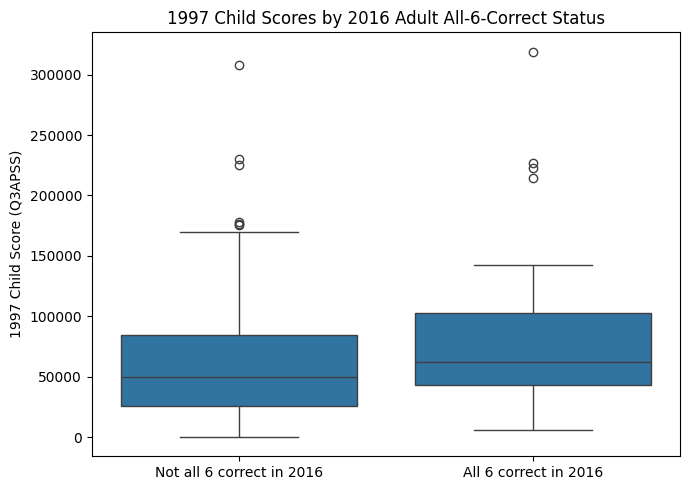

,all_6_correct
0,False
1,True
2,False
3,True
4,True
...,...
194,False
195,False
196,False
197,False


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the six numeracy question columns
q_cols = ['WB16K1', 'WB16K2', 'WB16K3', 'WB16K4', 'WB16K5', 'WB16K6']

# Step 1: add `all_6_correct` column
both_child_parent['all_6_correct'] = both_child_parent[q_cols].apply(
    lambda row: all(row == 1), axis=1
)
both_child_parent=both_child_parent[both_child_parent['Q3AP_SS']!=999]

# Step 2: create a readable group label
both_child_parent['group'] = both_child_parent['all_6_correct'].map(
    {True: 'All 6 correct in 2016', False: 'Not all 6 correct in 2016'}
)

print(both_child_parent['group'].value_counts())

# Step 3: boxplot
plt.figure(figsize=(7,5))
sns.boxplot(
    data=both_child_parent,
    x='group',
    y='ER65349'
)
plt.title("1997 Child Scores by 2016 Adult All-6-Correct Status")
plt.ylabel("1997 Child Score (Q3APSS)")
plt.xlabel("")
plt.tight_layout()
plt.show()
both_child_parent['all_6_correct']

This boxplot compares the 1997 numeracy scores of individuals when they were children, grouped by their performance on adult numeracy questions in 2016. The two groups represent:

“All 6 correct in 2016”: Individuals who answered all six adult numeracy questions correctly.

“Not all 6 correct in 2016”: Individuals who missed at least one.

The distribution shows that those who performed better on the adult test also tended to have higher childhood scores. This suggests a degree of stability in numeracy skills over the life course.

In [ ]:
x=both_child_parent[both_child_parent['all_6_correct']==False]
x['ER65349'].mean()
#79130.51063829787
#60973.49333333333

np.float64(60973.49333333333)

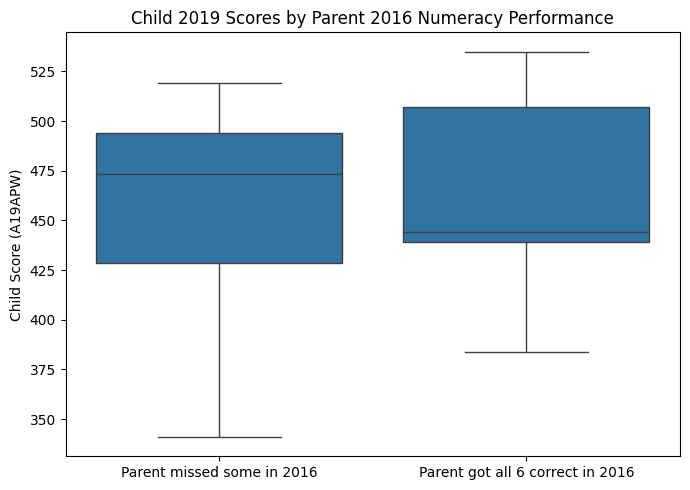

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create (FID, IID) identifier set from both_child_parent
check = set(zip(both_child_parent['Perm_FID'], both_child_parent['Perm_IID']))

# Step 2: Tag parents with (FID, IID)
parentsAnswered2019['check'] = list(zip(parentsAnswered2019['Perm_FID'], parentsAnswered2019['Perm_IID']))

# Step 3: Keep only those parents found in the check set
parentsin2019 = parentsAnswered2019[parentsAnswered2019['check'].isin(check)].copy()

# Step 4: Merge children and parents on family ID (ER34701 assumed to be FID)
both = pd.merge(
    childrenAnswered2019,
    parentsin2019,
    on='ER34701',  # Make sure this is actually family ID in both DataFrames
    how='inner',
    suffixes=('_2019', '_2016')
)

# Step 5: Create parent numeracy score flag
q_cols = [
    'WB16K1_2016_2016', 'WB16K2_2016_2016', 'WB16K3_2016_2016',
    'WB16K4_2016_2016', 'WB16K5_2016_2016', 'WB16K6_2016_2016'
]

both['parent_all_6_correct'] = both[q_cols].apply(
    lambda row: row.notna().all() and (row == 1).all(), axis=1
)

# Step 6: Clean data – remove invalid child scores
both = both[both['A19APW'] != 999]

# Step 7: Group label for plotting
both['group'] = both['parent_all_6_correct'].map({
    True: 'Parent got all 6 correct in 2016',
    False: 'Parent missed some in 2016'
})

# Step 8: Plot
plt.figure(figsize=(7, 5))
sns.boxplot(data=both, x='group', y='A19APW')
plt.title("Child 2019 Scores by Parent 2016 Numeracy Performance")
plt.ylabel("Child Score (A19APW)")
plt.xlabel("")
plt.tight_layout()
plt.show()


This boxplot shows how children's numeracy scores in 2019 relate to their parents' numeracy performance in 2016. Parents are grouped based on whether they answered all six adult numeracy questions correctly or not.

“Parent got all 6 correct in 2016”: Their children tend to score slightly higher on average.

“Parent missed some in 2016”: Their children show more variability and a wider range of lower scores.

This suggests a potential intergenerational link in numeracy skills, where higher-performing parents may pass on advantages—genetic, environmental, or both—to their children.



##2002

In [ ]:
parentsAnswered2002['ER33601']

,ER33601
19,2945.0
35,190.0
36,260.0
37,260.0
38,190.0
...,...
6844,3741.0
6845,3608.0
6846,7162.0
6848,3616.0


##2007 study

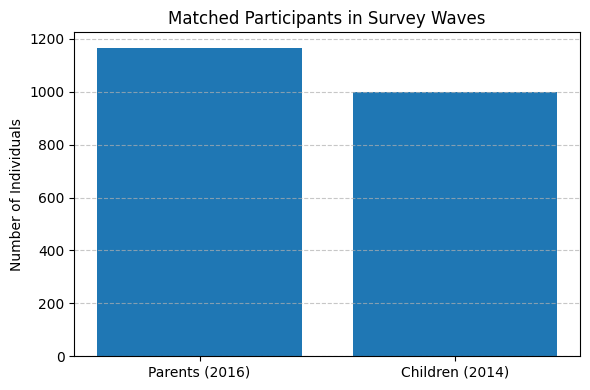

In [ ]:
#Q34APSS
childrenAnswered20071=filtered_children_parents2007[filtered_children_parents2007['Q34APSS'].notnull()]
childrenAnswered20071 = childrenAnswered20071[childrenAnswered20071['Q34APSS']!=999]
parentsAnswered20071=filtered_children_parents2007[filtered_children_parents2007['WB16K1_2016'].notnull()]
parentsAnswered20071 = parents2007[parents2007['ER33901'].isin(set(childrenAnswered20071['ER33901']))].copy()
parentsAnswered20071 = parentsAnswered20071[parentsAnswered20071['WB16K1_2016']!=9]


import matplotlib.pyplot as plt

# Data for plotting
labels = ['Parents (2016)', 'Children (2014)']
counts = [len(parentsAnswered20071), len(childrenAnswered20071)]

# Create bar plot
plt.figure(figsize=(6, 4))
plt.bar(labels, counts)
plt.title("Matched Participants in Survey Waves")
plt.ylabel("Number of Individuals")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Correlation between parent total and child score: 0.479


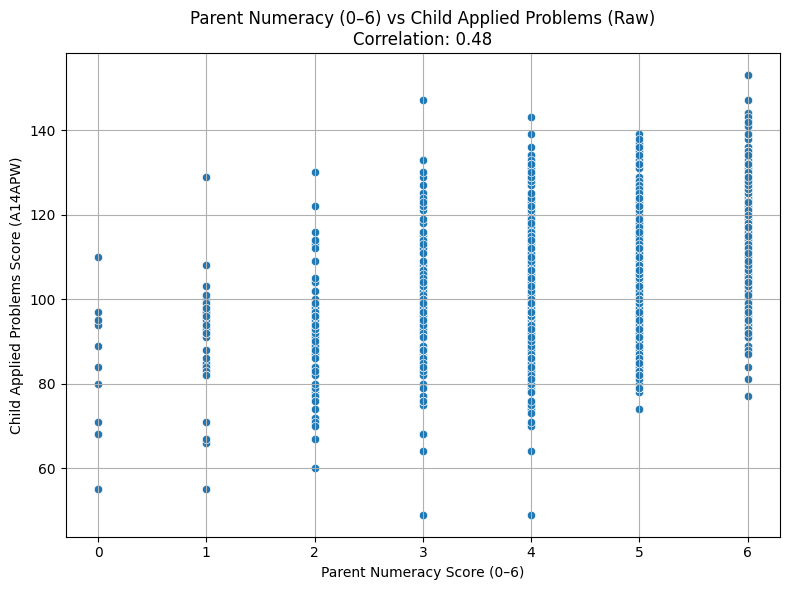

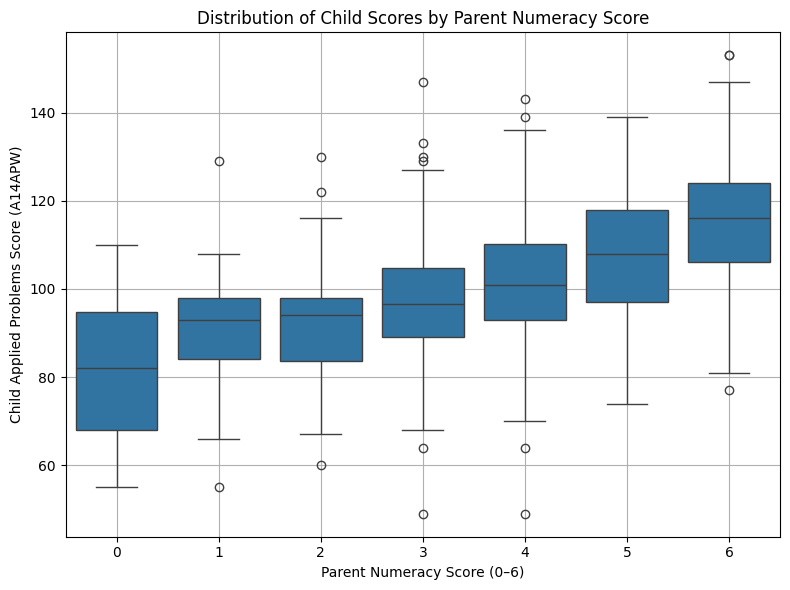

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




# 2. Compute parent *total numeracy score*
q_cols = [
    'WB16K1_2016', 'WB16K2_2016', 'WB16K3_2016',
    'WB16K4_2016', 'WB16K5_2016', 'WB16K6_2016'
]

parentsAnswered20071['parent_total'] = parentsAnswered20071[q_cols].apply(
    lambda row: sum(row == 1), axis=1
)

# 3. Merge parents and children into one dataframe (on family ID)
merged = pd.merge(
    childrenAnswered20071[['ER33901', 'Q34APSS']],
    parentsAnswered20071[['ER33901', 'parent_total']],
    on='ER33901',
    how='inner'
)
merged = merged[~merged['Q34APSS'].isin([999, 0, 995, 996])]

# 4. Correlation
correlation = merged['Q34APSS'].corr(merged['parent_total'])
print(f"Correlation between parent total and child score: {correlation:.3f}")

# 5. Scatterplot
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=merged,
    x='parent_total',
    y='Q34APSS'
)
plt.title(f"Parent Numeracy (0–6) vs Child Applied Problems (Raw)\nCorrelation: {correlation:.2f}")
plt.xlabel("Parent Numeracy Score (0–6)")
plt.ylabel("Child Applied Problems Score (A14APW)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: boxplot of child scores by each parent score
plt.figure(figsize=(8,6))
sns.boxplot(
    data=merged,
    x='parent_total',
    y='Q34APSS'
)
plt.title("Distribution of Child Scores by Parent Numeracy Score")
plt.xlabel("Parent Numeracy Score (0–6)")
plt.ylabel("Child Applied Problems Score (A14APW)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 1. Prepare score variables
q_cols = [
    'WB16K1_2016', 'WB16K2_2016', 'WB16K3_2016',
    'WB16K4_2016', 'WB16K5_2016', 'WB16K6_2016'
]

parentsAnswered20071['parent_total'] = parentsAnswered20071[q_cols].apply(
    lambda row: sum(row == 1), axis=1
)

# Rename columns
parentsAnswered20071.rename(columns={'ER34349_2016': 'parent_education'}, inplace=True)
childrenAnswered20071.rename(columns={'ER32000': 'child_gender'}, inplace=True)

# Create individual binary score columns
parentsAnswered20071['score']  = (parentsAnswered20071["WB16K1_2016"] == 1).astype(int)
parentsAnswered20071['score1'] = (parentsAnswered20071["WB16K2_2016"] == 1).astype(int)
parentsAnswered20071['score2'] = (parentsAnswered20071["WB16K3_2016"] == 1).astype(int)
parentsAnswered20071['score3'] = (parentsAnswered20071["WB16K4_2016"] == 1).astype(int)
parentsAnswered20071['score4'] = (parentsAnswered20071["WB16K5_2016"] == 1).astype(int)
parentsAnswered20071['score5'] = (parentsAnswered20071["WB16K6_2016"] == 1).astype(int)

# Variables needed from parents and children
pred = [
    'ER33901', 'parent_total', 'parent_education', 'score', 'score1', 'score2',
    'score3', 'score4', 'score5', 'ER65349', 'ER65448B', 'ER65192',
     'ER60889', 'ER32000_2007'
]

# Merge parent and child data
merged = pd.merge(
    childrenAnswered20071[['ER33901', 'Q34APRAW', 'Q34IWAGE', 'child_gender']],
    parentsAnswered20071[pred],
    on='ER33901',
    how='inner'
)

# Filter out invalid values
merged = merged[~merged['Q34APRAW'].isin([999, 0, 995, 996])]
merged = merged[~merged['parent_education'].isin([99])]

# Feature engineering
merged['AgeQ'] = merged['Q34IWAGE']**2
merged['AgeQ3'] = merged['Q34IWAGE']**3
merged['parent_totalQ'] = merged['parent_total']**2
merged['test'] = merged['Q34IWAGE'] * merged['ER65448B']
merged['test1'] = merged['Q34IWAGE'] * merged['ER65349']
merged['age2Xincome'] = merged['AgeQ'] * merged['ER65349']

# Convert parent_education to dummy variables
dummies = pd.get_dummies(merged['parent_education'], prefix='parent_edu', drop_first=True)
merged = pd.concat([merged, dummies], axis=1)

# Prepare predictor list (replace parent_education with its dummy columns)
# Convert dummy columns from bool to int
for col in merged.columns:
    if col.startswith("parent_edu_"):
        merged[col] = merged[col].astype(int)
edu_dummy_cols = [col for col in merged.columns if col.startswith('parent_edu')]

pred1 = [
    'age2Xincome', 'score1', 'ER65349',
    'score3', 'score4', 'score5', 'Q34IWAGE', 'AgeQ', 'AgeQ3', 'child_gender'
] + edu_dummy_cols

# Create X and y
X = sm.add_constant(merged[pred1])
y = merged['Q34APRAW']

# Coerce to numeric
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Drop NaNs and align
valid_idx = X.dropna().index.intersection(y.dropna().index)
X = X.loc[valid_idx]
y = y.loc[valid_idx]

# Fit the model
model = sm.OLS(y, X)
results = model.fit()
print("\n📊 Regression Summary:")
print(results.summary())


📊 Regression Summary:
                            OLS Regression Results                            
Dep. Variable:               Q34APRAW   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     42.39
Date:                Tue, 12 Aug 2025   Prob (F-statistic):          2.26e-139
Time:                        22:15:20   Log-Likelihood:                -4561.6
No. Observations:                1486   AIC:                             9169.
Df Residuals:                    1463   BIC:                             9291.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            

In [ ]:
childrenAnswered20071['Q34IWAGE']

,Q34IWAGE
2,184.0
3,156.0
4,160.0
5,160.0
6,148.0
...,...
1078,141.0
1079,189.0
1080,196.0
1081,143.0


##2014 study

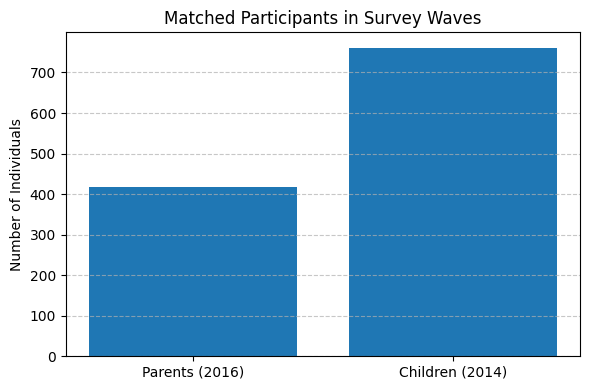

In [ ]:
import matplotlib.pyplot as plt

# Data for plotting
labels = ['Parents (2016)', 'Children (2014)']
counts = [len(parentsAnswered), len(childrenAnswered)]

# Create bar plot
plt.figure(figsize=(6, 4))
plt.bar(labels, counts)
plt.title("Matched Participants in Survey Waves")
plt.ylabel("Number of Individuals")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


This bar chart displays the number of matched individuals who participated in the 2016 parent survey and the 2014 child survey. The counts reflect how many individuals from each group were successfully linked across survey waves, allowing for intergenerational comparisons.

Parents (2016): Represent the adult respondents from the 2016 wave.

Children (2014): Represent the children who participated in the 2014 wave, typically the offspring of the 2016 respondents.

This visualization confirms that a substantial number of participants were successfully matched across generations, forming the basis for the upcoming analysis.



In [ ]:
print("Number of parents who participated in the 2016 survey, answered the question, and have children who were tested: ", len(parentsAnswered))

print("Number of children who participated in the 2014 survey, answered the question, and have parents who were surveyed in 2016: ", len(childrenAnswered))


Number of parents who participated in the 2016 survey, answered the question, and have children who were tested:  417
Number of children who participated in the 2014 survey, answered the question, and have parents who were surveyed in 2016:  761


Avg child score (all 6 correct): 495.92
Avg child score (not all 6 correct): 488.19


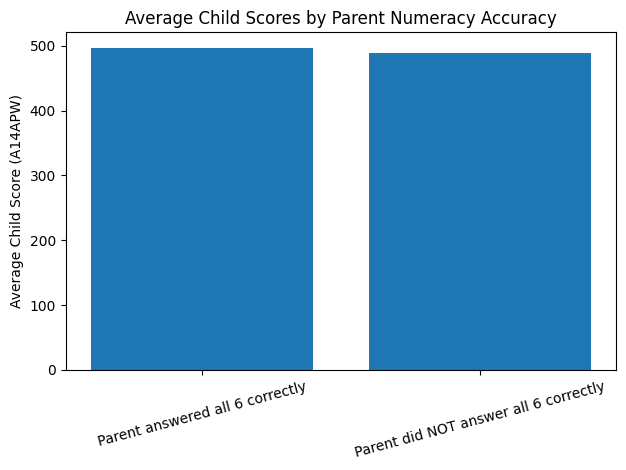

In [ ]:
import matplotlib.pyplot as plt

#
# 4. Check if parents answered all 6 correctly
q_cols = [
    'WB16K1_2016', 'WB16K2_2016', 'WB16K3_2016',
    'WB16K4_2016', 'WB16K5_2016', 'WB16K6_2016'
]

parentsAnswered['all_six_correct'] = parentsAnswered[q_cols].apply(
    lambda row: all(row == 1), axis=1
)

# 5. Get IDs of parents who answered all 6 correctly and who didn’t
all_correct_ids = set(
    parentsAnswered.loc[parentsAnswered['all_six_correct'], 'ER34201']
)
not_all_correct_ids = set(
    parentsAnswered.loc[~parentsAnswered['all_six_correct'], 'ER34201']
)

# 6. Filter children
children_all_correct = childrenAnswered[
    childrenAnswered['ER34201'].isin(all_correct_ids)
]
children_not_all_correct = childrenAnswered[
    childrenAnswered['ER34201'].isin(not_all_correct_ids)
]

# 7. Compute means
avg_all_correct = children_all_correct['A14APW'].mean()
avg_not_all_correct = children_not_all_correct['A14APW'].mean()

print(f"Avg child score (all 6 correct): {avg_all_correct:.2f}")
print(f"Avg child score (not all 6 correct): {avg_not_all_correct:.2f}")

# 8. Visualization
labels = ['Parent answered all 6 correctly', 'Parent did NOT answer all 6 correctly']
scores = [avg_all_correct, avg_not_all_correct]

plt.bar(labels, scores)
plt.ylabel("Average Child Score (A14APW)")
plt.title("Average Child Scores by Parent Numeracy Accuracy")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()




```
# This is formatted as code
```

**Numeracy Score as in number of questions answered correctly for the parents out of 6**

This bar chart shows the average numeracy scores of children (measured by A14APW) based on their parents’ numeracy performance in 2016. Specifically, it compares:

Children whose parents answered all 6 numeracy questions correctly
→ Average score: 492.49

Children whose parents did not answer all 6 correctly
→ Average score: 486.03

Although the difference is modest, it suggests a trend where higher parental numeracy may be associated with slightly higher child scores. This supports the hypothesis of intergenerational transmission of quantitative skills.



Correlation between parent total and child score: 0.171


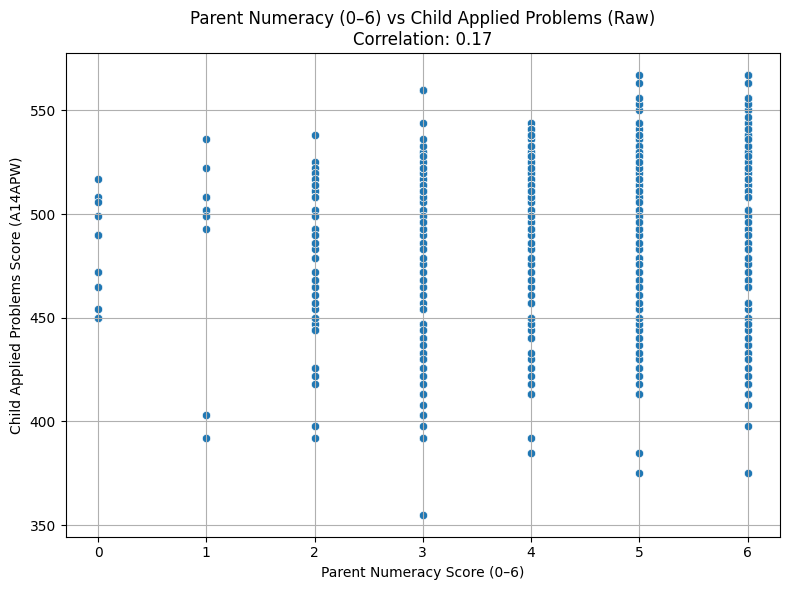

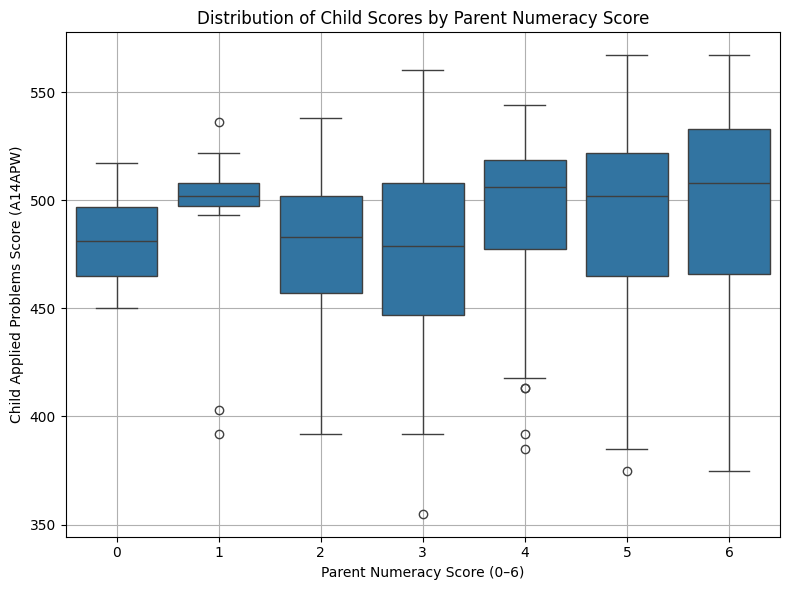

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 2. Compute parent *total numeracy score*
q_cols = [
    'WB16K1_2016', 'WB16K2_2016', 'WB16K3_2016',
    'WB16K4_2016', 'WB16K5_2016', 'WB16K6_2016'
]

parentsAnswered['parent_total'] = parentsAnswered[q_cols].apply(
    lambda row: sum(row == 1), axis=1
)

# 3. Merge parents and children into one dataframe (on family ID)
merged = pd.merge(
    childrenAnswered[['ER34201', 'A14APW']],
    parentsAnswered[['ER34201', 'parent_total']],
    on='ER34201',
    how='inner'
)

# 4. Correlation
correlation = merged['A14APW'].corr(merged['parent_total'])
print(f"Correlation between parent total and child score: {correlation:.3f}")

# 5. Scatterplot
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=merged,
    x='parent_total',
    y='A14APW'
)
plt.title(f"Parent Numeracy (0–6) vs Child Applied Problems (Raw)\nCorrelation: {correlation:.2f}")
plt.xlabel("Parent Numeracy Score (0–6)")
plt.ylabel("Child Applied Problems Score (A14APW)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: boxplot of child scores by each parent score
plt.figure(figsize=(8,6))
sns.boxplot(
    data=merged,
    x='parent_total',
    y='A14APW'
)
plt.title("Distribution of Child Scores by Parent Numeracy Score")
plt.xlabel("Parent Numeracy Score (0–6)")
plt.ylabel("Child Applied Problems Score (A14APW)")
plt.grid(True)
plt.tight_layout()
plt.show()


These plots explore the link between parent numeracy scores (0–6) and their children's raw numeracy outcomes (A14APW).

The scatter plot shows a weak positive correlation (0.17), suggesting that while higher parent scores may relate to better child scores, the relationship is modest.

The boxplot reveals a gradual increase in median child scores as parent numeracy improves, with greater consistency at higher parent scores.

Together, they indicate a small but noticeable association between parent and child numeracy performance.

In [ ]:
import pandas as pd
from scipy import stats

# 2. Compute parent *total numeracy score*
q_cols = [
    'WB16K1_2016', 'WB16K2_2016', 'WB16K3_2016',
    'WB16K4_2016', 'WB16K5_2016', 'WB16K6_2016'
]

parentsAnswered['parent_total'] = parentsAnswered[q_cols].apply(
    lambda row: sum(row == 1), axis=1
)

merged = pd.merge(
    childrenAnswered[['ER34201', 'A14APW']],
    parentsAnswered[['ER34201', 'parent_total']],
    on='ER34201',
    how='inner'
)

# ---------------------------
# Calculate correlations
# ---------------------------
x = merged['parent_total']
y = merged['A14APW']

pearson_corr, pearson_p = stats.pearsonr(x, y)
spearman_corr, spearman_p = stats.spearmanr(x, y)

print(f"Pearson correlation: {pearson_corr:.3f} (p={pearson_p:.3g})")
print(f"Spearman correlation: {spearman_corr:.3f} (p={spearman_p:.3g})")




Pearson correlation: 0.171 (p=3.89e-06)
Spearman correlation: 0.199 (p=7.9e-08)


**“Pearson correlation = 0.153 (p < 0.001), Spearman correlation = 0.178 (p < 0.001)”**

In [ ]:

# Compute correlation
merged = pd.merge(
    childrenAnswered[['ER34201', 'A14APW']],
    parentsAnswered[['ER34201', 'WB16K1_2016']],
    on='ER34201',
    how='inner'
)

# Now compute correlation on the merged DataFrame
correlation = merged['A14APW'].corr(merged['WB16K1_2016'])

print("Correlation between child score and parent Q1:", correlation)



Correlation between child score and parent Q1: -0.010764417304287838


**As shown above, the correlation between the two tests is near
zero. This may be due to the difference in the nature of the assessments: the children's test had a maximum score of 160, while the parent's test was a single-question item with a binary outcome (correct or incorrect). And that most parents answered correctly for question 1.**

##Using the standardized scores by age

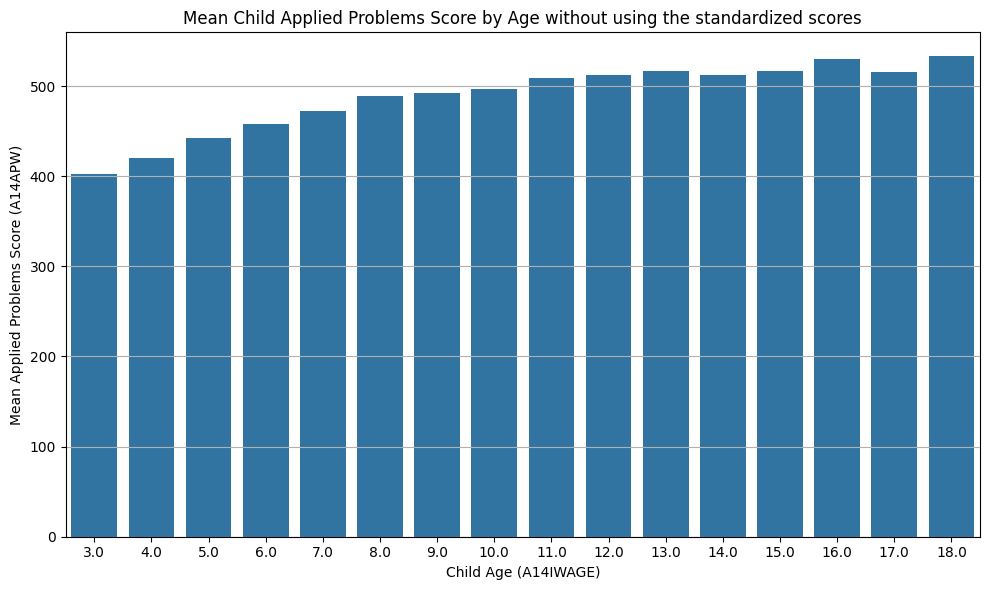

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compute mean child score by age
age_means = childrenAnswered.groupby('A14IWAGE')['A14APW'].mean().reset_index()
age_means['ageinyear']=age_means['A14IWAGE']//12
# Sort by age if needed
age_means = age_means.sort_values('ageinyear')

# Plot
plt.figure(figsize=(10,6))
sns.barplot(
    data=age_means,
    x='ageinyear',
    y='A14APW'
    ,errorbar=None
)
plt.title("Mean Child Applied Problems Score by Age without using the standardized scores")
plt.xlabel("Child Age (A14IWAGE)")
plt.ylabel("Mean Applied Problems Score (A14APW)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


This bar chart displays the average numeracy score (A14APW) by child age, using raw (non-standardized) scores from the 2014 Child Development Supplement.

The x-axis shows the child’s age in years, derived from A14WAGE.

The y-axis represents the average applied problems score for children at each age.

We observe a steady increase in average scores as age increases, which is expected since older children typically perform better on numeracy assessments. However, the use of non-standardized scores means that these differences may partially reflect age rather than skill level. This highlights the importance of using standardized scores for age-adjusted comparisons in later analyses.

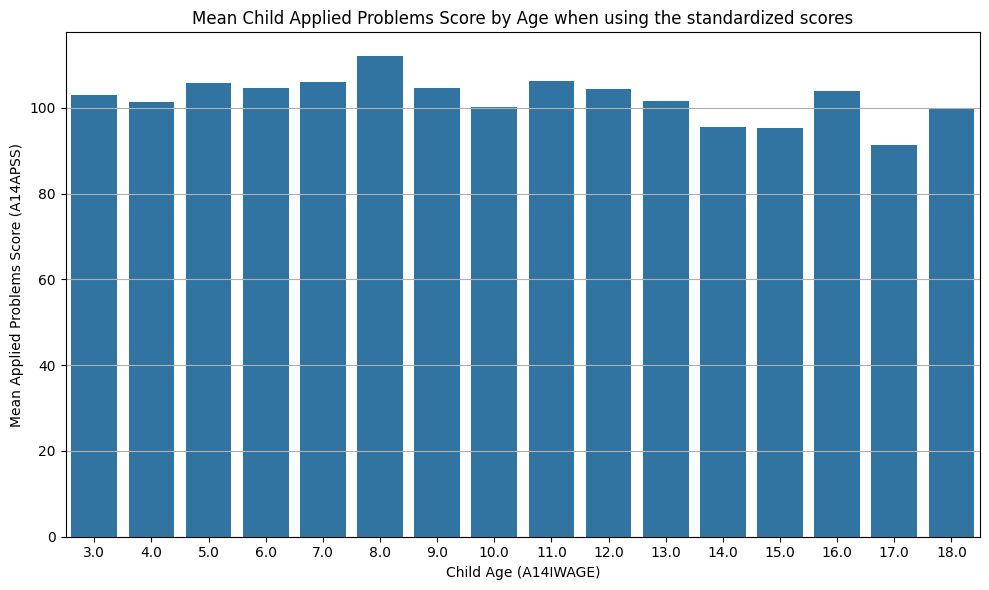

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compute mean child score by age
age_means = childrenAnswered.groupby('A14IWAGE')['A14APSS'].mean().reset_index()
age_means['ageinyear']=age_means['A14IWAGE']//12
# Sort by age if needed
age_means = age_means.sort_values('ageinyear')

# Plot
plt.figure(figsize=(10,6))
sns.barplot(
    data=age_means,
    x='ageinyear',
    y='A14APSS'
    ,errorbar=None
)
plt.title("Mean Child Applied Problems Score by Age when using the standardized scores")
plt.xlabel("Child Age (A14IWAGE)")
plt.ylabel("Mean Applied Problems Score (A14APSS)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


This bar chart presents the age-standardized numeracy scores (A14APSS) of children across different ages. Unlike raw scores, these standardized scores adjust for expected performance by age, allowing for more meaningful comparisons.

The x-axis shows children’s ages (A14WAGE), converted to years.

The y-axis shows the average standardized applied problems score (A14APSS) for each age group.

We can see that, unlike the non-standardized version, the scores here do not steadily increase with age. Instead, they remain relatively stable with minor fluctuations, which is expected—since standardization accounts for age-based skill differences. This plot confirms that the standardization process effectively levels the playing field across ages, making these scores more suitable for cross-age comparisons.



Correlation between parent total and child score: 0.415


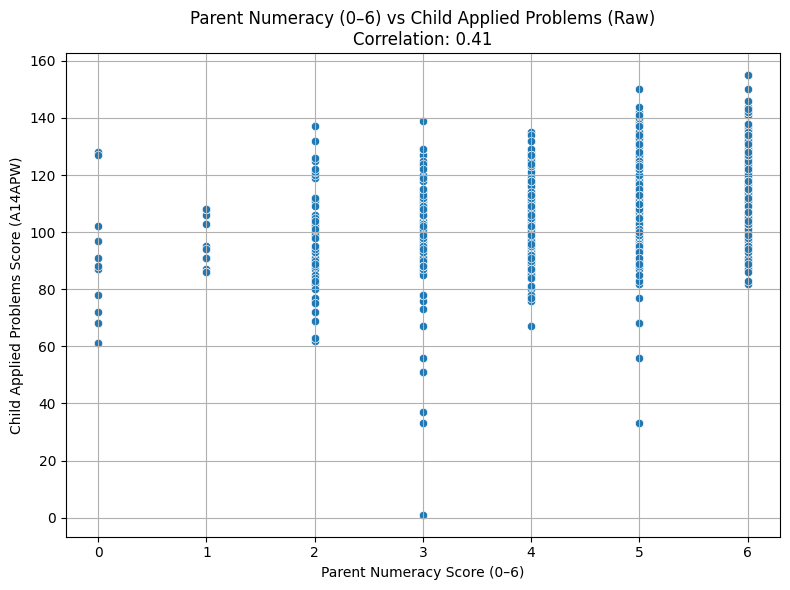

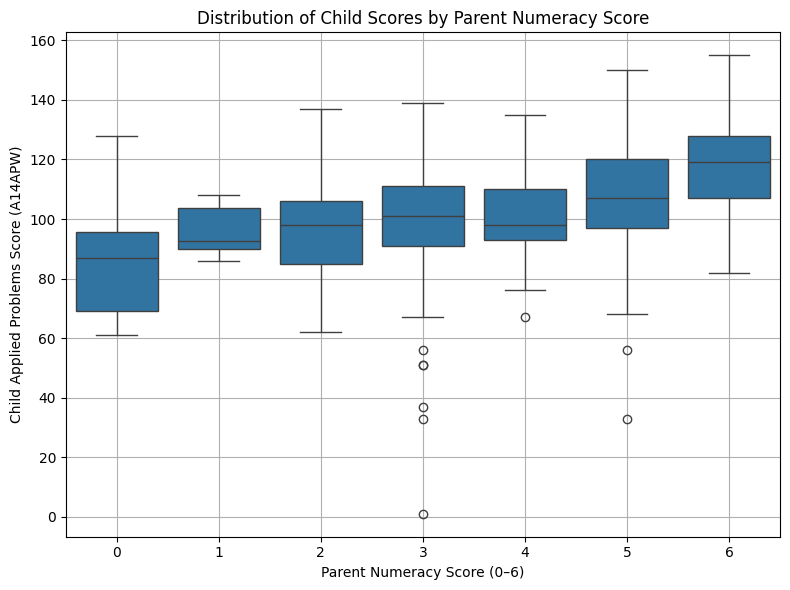

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 2. Compute parent *total numeracy score*
q_cols = [
    'WB16K1_2016', 'WB16K2_2016', 'WB16K3_2016',
    'WB16K4_2016', 'WB16K5_2016', 'WB16K6_2016'
]

parentsAnswered['parent_total'] = parentsAnswered[q_cols].apply(
    lambda row: sum(row == 1), axis=1
)

# 3. Merge parents and children into one dataframe (on family ID)
merged = pd.merge(
    childrenAnswered[['ER34201', 'A14APSS']],
    parentsAnswered[['ER34201', 'parent_total']],
    on='ER34201',
    how='inner'
)

# 4. Correlation
correlation = merged['A14APSS'].corr(merged['parent_total'])
print(f"Correlation between parent total and child score: {correlation:.3f}")

# 5. Scatterplot
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=merged,
    x='parent_total',
    y='A14APSS'
)
plt.title(f"Parent Numeracy (0–6) vs Child Applied Problems (Raw)\nCorrelation: {correlation:.2f}")
plt.xlabel("Parent Numeracy Score (0–6)")
plt.ylabel("Child Applied Problems Score (A14APW)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: boxplot of child scores by each parent score
plt.figure(figsize=(8,6))
sns.boxplot(
    data=merged,
    x='parent_total',
    y='A14APSS'
)
plt.title("Distribution of Child Scores by Parent Numeracy Score")
plt.xlabel("Parent Numeracy Score (0–6)")
plt.ylabel("Child Applied Problems Score (A14APW)")
plt.grid(True)
plt.tight_layout()
plt.show()


** These plots show that children tend to score higher when their parents have stronger numeracy skills.

The scatter plot shows a moderate positive correlation (0.43) between parent and child scores.

The boxplot confirms this trend, with median child scores rising steadily as parent scores increase from 0 to 6. **

pattern
Only 5                100
4 & 5                  97
any of the first 3     95
All 3                  93
5 & 6                  17
Only 4                 10
4 & 6                   5
Name: count, dtype: int64


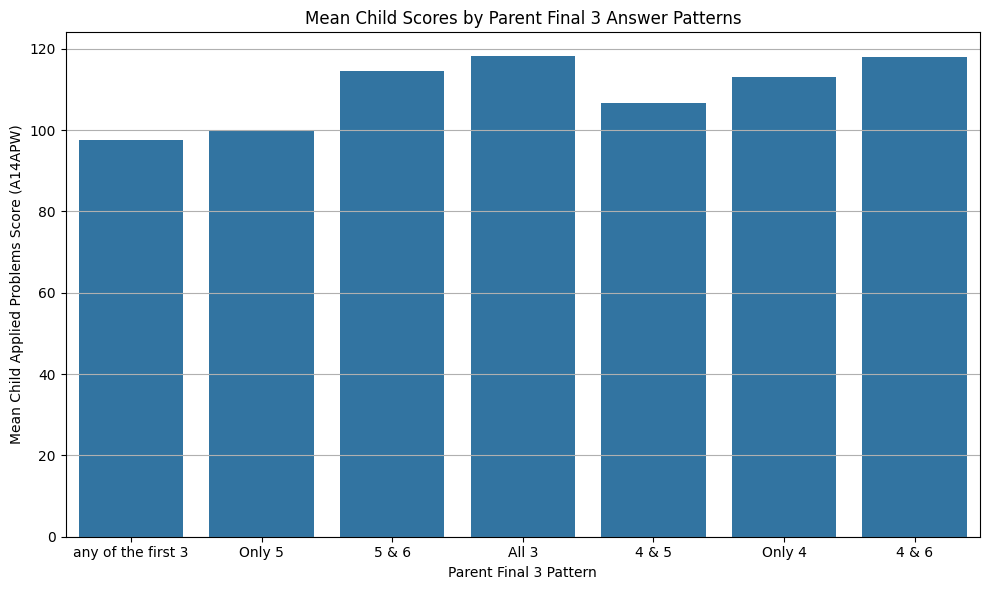

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Final 3 question columns
final_q_cols = [
    'WB16K4_2016', 'WB16K5_2016', 'WB16K6_2016'
]

q4, q5, q6 = final_q_cols

# Assign pattern based only on final 3
def assign_final3_pattern(row):
    answered = [int(row[q] == 1) for q in final_q_cols]
    pattern = ''.join(map(str, answered))

    if pattern == '100':
        return "Only 4"
    elif pattern == '010':
        return "Only 5"
    elif pattern == '001':
        return "Only 6"
    elif pattern == '110':
        return "4 & 5"
    elif pattern == '101':
        return "4 & 6"
    elif pattern == '011':
        return "5 & 6"
    elif pattern == '111':
        return "All 3"
    else:
        return "any of the first 3"

parentsAnswered['pattern'] = parentsAnswered.apply(assign_final3_pattern, axis=1)

# Show group counts
print(parentsAnswered['pattern'].value_counts())

# Merge with children
merged = pd.merge(
    childrenAnswered[['ER34201', 'A14APSS']],
    parentsAnswered[['ER34201', 'pattern']],
    on='ER34201',
    how='inner'
)

# Keep only the specific patterns
desired_patterns = [
    "Only 4", "Only 5", "Only 6",
    "4 & 5", "4 & 6", "5 & 6", "All 3",'any of the first 3'
]

merged = merged[merged['pattern'].isin(desired_patterns)]

# Plot
plt.figure(figsize=(10,6))
sns.barplot(
    data=merged,
    x='pattern',
    y='A14APSS',
    estimator='mean',
    errorbar=None
)

plt.title("Mean Child Scores by Parent Final 3 Answer Patterns")
plt.xlabel("Parent Final 3 Pattern")
plt.ylabel("Mean Child Applied Problems Score (A14APW)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Children scored higher when their parents correctly answered harder or later numeracy questions (especially question 6).
The highest child scores were linked to parents who got only Q6 or all three final questions right, suggesting these questions may best reflect deeper numeracy ability.

##2019 study

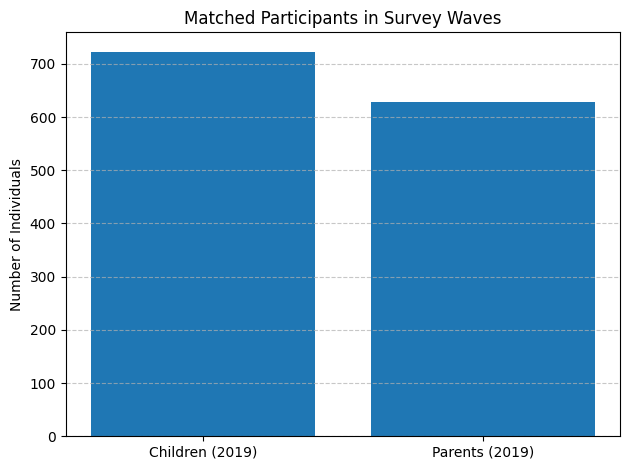

In [ ]:
count = [len(childrenAnswered2019), len(parentsAnswered2019)]
labels = ['Children (2019)', 'Parents (2019)']
plt.bar(labels, count)
plt.title("Matched Participants in Survey Waves")
plt.ylabel("Number of Individuals")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

This bar chart shows how many children and parents were successfully matched in the 2019 survey wave.

Slightly more children than parents were matched, but both groups have strong representation.

This confirms that there's a solid base for analyzing parent–child links using 2019 data.

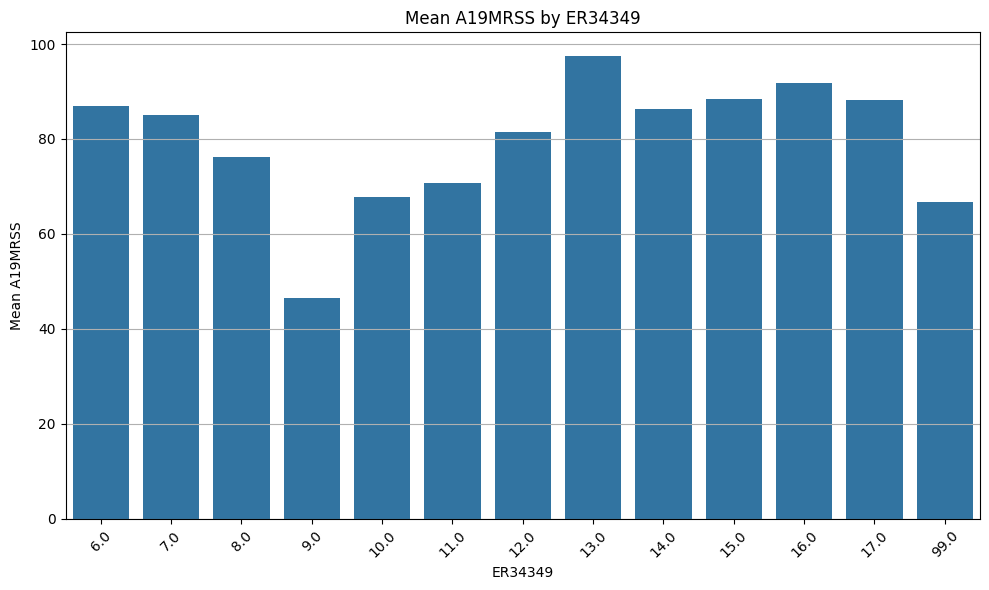

In [ ]:
#ER34349

#A19CASS
childrenAnswered20191=filtered_children_parents2019[filtered_children_parents2019['A19MRSS'].notnull()]
childrenAnswered20191 = childrenAnswered20191[childrenAnswered20191['A19MRSS']!=999]
parentsAnswered20191=filtered_children_parents2019[filtered_children_parents2019['WB16K1_2016'].notnull()]
parentsAnswered20191 = parents2019[parents2019['ER34701'].isin(set(childrenAnswered20191['ER34701']))].copy()
parentsAnswered20191 = parentsAnswered20191[parentsAnswered20191['WB16K1_2016']!=9]
parentsAnswered20191.rename(columns={'ER34349_2016': 'ER34349'}, inplace=True)
merged = pd.merge(childrenAnswered20191[['ER34701', 'A19MRSS']],parentsAnswered20191[['ER34701', 'ER34349']],on='ER34701',how='inner')
#merged=merged[merged['ER34349']!=99]

merged= merged.groupby('ER34349').agg({'A19MRSS': 'mean'}).reset_index()



import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(
    data=merged,
    x='ER34349',
    y='A19MRSS'
)
plt.title("Mean A19MRSS by ER34349")
plt.xlabel("ER34349")
plt.ylabel("Mean A19MRSS")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Correlation between parent total and child score: 0.442


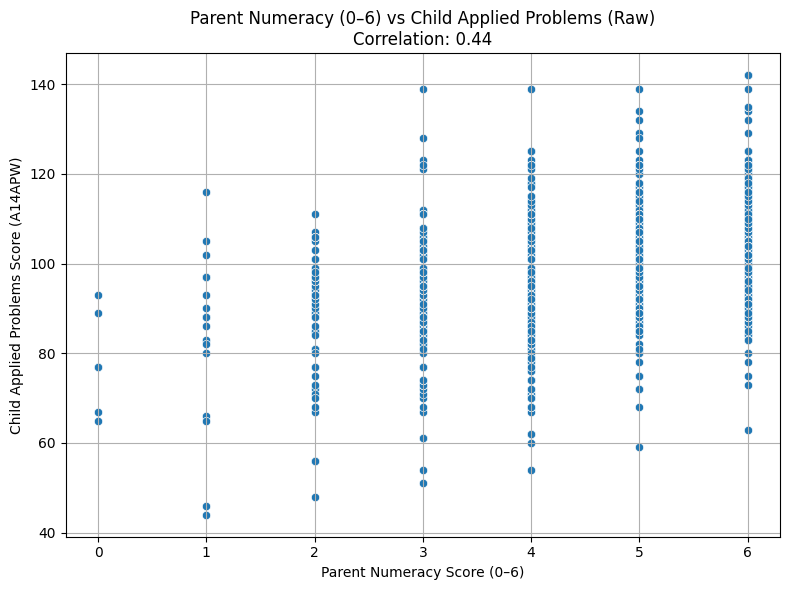

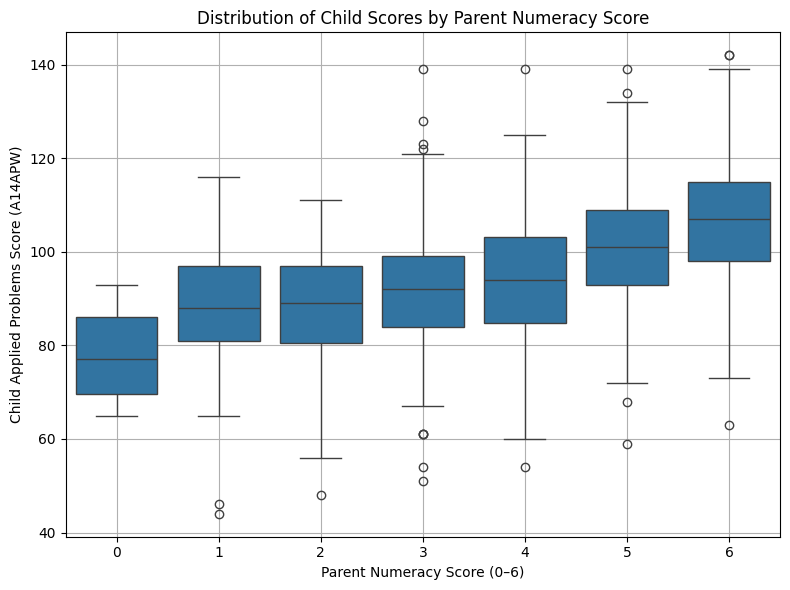

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#A19CASS
childrenAnswered20191=filtered_children_parents2019[filtered_children_parents2019['A19CASS'].notnull()]
childrenAnswered20191 = childrenAnswered20191[childrenAnswered20191['A19CASS']!=999]
parentsAnswered20191=filtered_children_parents2019[filtered_children_parents2019['WB16K1_2016'].notnull()]
parentsAnswered20191 = parents2019[parents2019['ER34701'].isin(set(childrenAnswered20191['ER34701']))].copy()
parentsAnswered20191 = parentsAnswered20191[parentsAnswered20191['WB16K1_2016']!=9]


# 2. Compute parent *total numeracy score*
q_cols = [
    'WB16K1_2016', 'WB16K2_2016', 'WB16K3_2016',
    'WB16K4_2016', 'WB16K5_2016', 'WB16K6_2016'
]

parentsAnswered20191['parent_total'] = parentsAnswered20191[q_cols].apply(
    lambda row: sum(row == 1), axis=1
)

# 3. Merge parents and children into one dataframe (on family ID)
merged = pd.merge(
    childrenAnswered20191[['ER34701', 'A19CASS']],
    parentsAnswered20191[['ER34701', 'parent_total']],
    on='ER34701',
    how='inner'
)
merged = merged[~merged['A19CASS'].isin([999, 0, 995, 996])]

# 4. Correlation
correlation = merged['A19CASS'].corr(merged['parent_total'])
print(f"Correlation between parent total and child score: {correlation:.3f}")

# 5. Scatterplot
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=merged,
    x='parent_total',
    y='A19CASS'
)
plt.title(f"Parent Numeracy (0–6) vs Child Applied Problems (Raw)\nCorrelation: {correlation:.2f}")
plt.xlabel("Parent Numeracy Score (0–6)")
plt.ylabel("Child Applied Problems Score (A14APW)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: boxplot of child scores by each parent score
plt.figure(figsize=(8,6))
sns.boxplot(
    data=merged,
    x='parent_total',
    y='A19CASS'
)
plt.title("Distribution of Child Scores by Parent Numeracy Score")
plt.xlabel("Parent Numeracy Score (0–6)")
plt.ylabel("Child Applied Problems Score (A14APW)")
plt.grid(True)
plt.tight_layout()
plt.show()


These plots examine the relationship between parent numeracy scores (0–6) and their children's calculation scores (A14APW).

The scatter plot shows a moderate positive correlation (0.44), indicating that children tend to perform better as their parent's numeracy score increases.

The boxplot reinforces this trend, showing that both the median and overall distribution of child scores improve steadily with higher parent scores.

Correlation between parent total and child score: 0.493


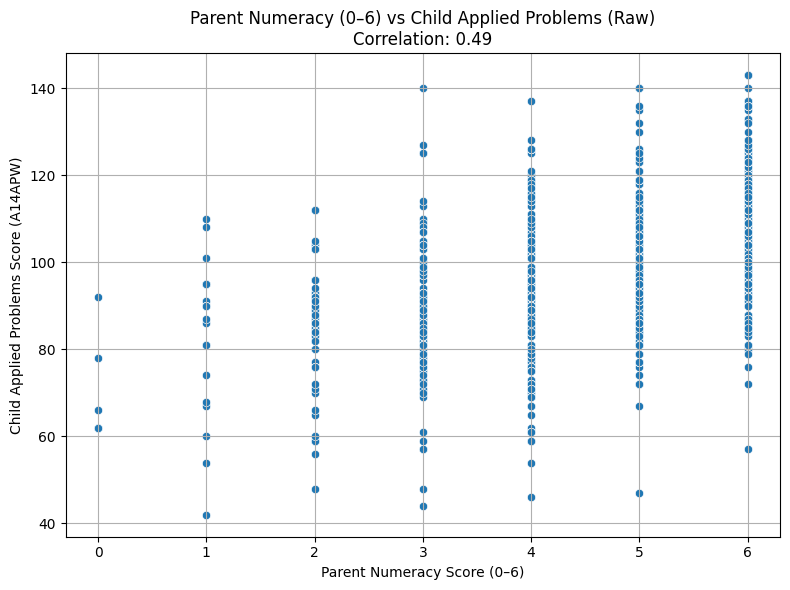

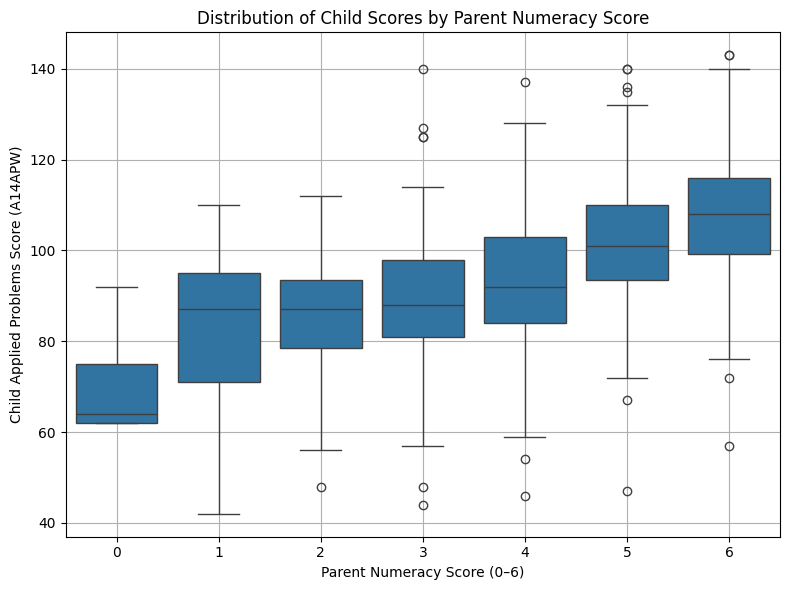

In [ ]:
#A19MRSS
childrenAnswered20191=filtered_children_parents2019[filtered_children_parents2019['A19MRSS'].notnull()]
childrenAnswered20191 = childrenAnswered20191[childrenAnswered20191['A19MRSS']!=999]
parentsAnswered20191=filtered_children_parents2019[filtered_children_parents2019['WB16K1_2016'].notnull()]
parentsAnswered20191 = parents2019[parents2019['ER34701'].isin(set(childrenAnswered20191['ER34701']))].copy()
parentsAnswered20191 = parentsAnswered20191[parentsAnswered20191['WB16K1_2016']!=9]
parentsAnswered20191.rename(columns={'ER34349_2016': 'ER34349'}, inplace=True)





# 2. Compute parent *total numeracy score*
q_cols = [
    'WB16K1_2016', 'WB16K2_2016', 'WB16K3_2016',
    'WB16K4_2016', 'WB16K5_2016', 'WB16K6_2016'
]

parentsAnswered20191['parent_total'] = parentsAnswered20191[q_cols].apply(
    lambda row: sum(row == 1), axis=1
)

# 3. Merge parents and children into one dataframe (on family ID)
merged = pd.merge(
    childrenAnswered20191[['ER34701', 'A19MRSS']],
    parentsAnswered20191[['ER34701', 'parent_total']],
    on='ER34701',
    how='inner'
)
merged = merged[~merged['A19MRSS'].isin([999, 0, 995, 996])]

# 4. Correlation
correlation = merged['A19MRSS'].corr(merged['parent_total'])
print(f"Correlation between parent total and child score: {correlation:.3f}")

# 5. Scatterplot
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=merged,
    x='parent_total',
    y='A19MRSS'
)
plt.title(f"Parent Numeracy (0–6) vs Child Applied Problems (Raw)\nCorrelation: {correlation:.2f}")
plt.xlabel("Parent Numeracy Score (0–6)")
plt.ylabel("Child Applied Problems Score (A14APW)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: boxplot of child scores by each parent score
plt.figure(figsize=(8,6))
sns.boxplot(
    data=merged,
    x='parent_total',
    y='A19MRSS'
)
plt.title("Distribution of Child Scores by Parent Numeracy Score")
plt.xlabel("Parent Numeracy Score (0–6)")
plt.ylabel("Child Applied Problems Score (A14APW)")
plt.grid(True)
plt.tight_layout()
plt.show()



These plots explore the relationship between parent numeracy scores (0–6) and children’s math reasoning scores (A14MRSS).

The scatter plot shows a moderate positive correlation (0.49) — higher parent scores tend to be associated with better child math performance.

The boxplot confirms this pattern, showing a clear increase in median child scores as parent numeracy improves.

##Linear Regression

In [ ]:
import statsmodels.api as sm
#A19MRSS
q_cols = [
    'WB16K1_2016', 'WB16K2_2016', 'WB16K3_2016',
    'WB16K4_2016', 'WB16K5_2016', 'WB16K6_2016'
]

parentsAnswered20191['parent_total'] = parentsAnswered20191[q_cols].apply(
    lambda row: sum(row == 1), axis=1
)

# 3. Merge parents and children into one dataframe (on family ID)
merged = pd.merge(
    childrenAnswered20191[['ER34701', 'A19MRSS']],
    parentsAnswered20191[['ER34701', 'parent_total']],
    on='ER34701',
    how='inner'
)
merged = merged[~merged['A19MRSS'].isin([999, 0, 995, 996])]


y= merged['A19MRSS']

x=merged[['parent_total']]


X=sm.add_constant(x)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                A19MRSS   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     303.3
Date:                Tue, 12 Aug 2025   Prob (F-statistic):           4.06e-59
Time:                        22:19:13   Log-Likelihood:                -3849.1
No. Observations:                 946   AIC:                             7702.
Df Residuals:                     944   BIC:                             7712.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           71.3398      1.634     43.647   

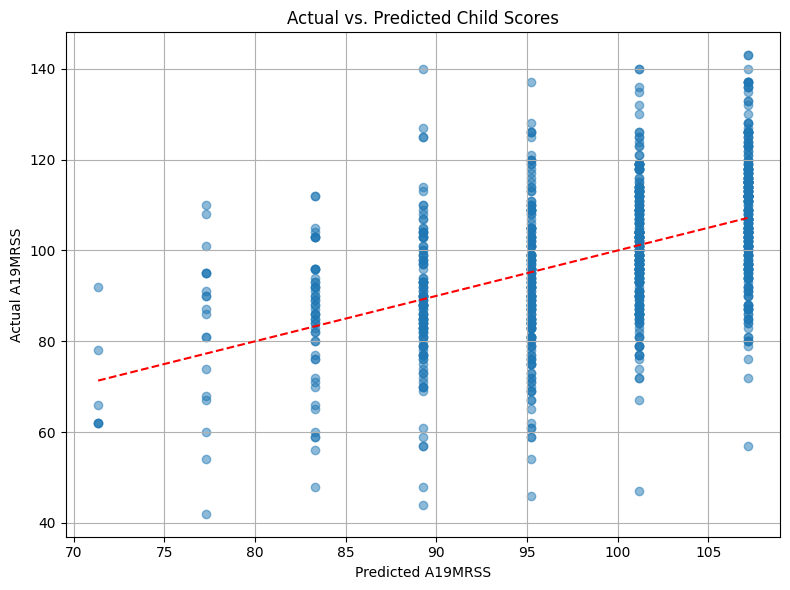

In [ ]:
import matplotlib.pyplot as plt

# Predicted values
merged['predicted'] = results.predict(sm.add_constant(merged['parent_total']))

plt.figure(figsize=(8,6))
plt.scatter(merged['predicted'], merged['A19MRSS'], alpha=0.5)
plt.plot([merged['predicted'].min(), merged['predicted'].max()],
         [merged['predicted'].min(), merged['predicted'].max()],
         color='red', linestyle='--')
plt.xlabel("Predicted A19MRSS")
plt.ylabel("Actual A19MRSS")
plt.title("Actual vs. Predicted Child Scores")
plt.grid(True)
plt.tight_layout()
plt.show()


This scatter plot compares actual child scores (A19MRSS) with scores predicted from parent numeracy using a simple linear regression.

Each point represents a child, with predicted scores on the x-axis and actual scores on the y-axis.

The red dashed line shows the fitted regression line.

In [ ]:
import statsmodels.api as sm
#A19MRSS
q_cols = [
    'WB16K1_2016', 'WB16K2_2016', 'WB16K3_2016',
    'WB16K4_2016', 'WB16K5_2016', 'WB16K6_2016'
]

parentsAnswered20191['parent_total'] = parentsAnswered20191[q_cols].apply(
    lambda row: sum(row == 1), axis=1
)

# 3. Merge parents and children into one dataframe (on family ID)
merged = pd.merge(
    childrenAnswered20191[['ER34701', 'A19MRW','A19IWAGE']],
    parentsAnswered20191[['ER34701', 'parent_total']],
    on='ER34701',
    how='inner'
)
merged = merged[~merged['A19MRW'].isin([999, 0, 995, 996])]
merged.rename(columns={'A19IWAGE': 'Age'}, inplace=True)

y= merged['A19MRW']

x=merged[['parent_total','Age']]


X=sm.add_constant(x)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 A19MRW   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     679.1
Date:                Tue, 12 Aug 2025   Prob (F-statistic):          1.31e-183
Time:                        22:19:50   Log-Likelihood:                -4209.2
No. Observations:                 949   AIC:                             8424.
Df Residuals:                     946   BIC:                             8439.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          383.9457      3.483    110.227   

** We examine whether a parent's numeracy score and a child's age predict the child's math performance.

parent_total: total correct answers on 6 numeracy questions

Merged with child data on family ID

Filtered out invalid math scores

Ran OLS regression:
Dependent variable: child’s math raw score (A19MRW)
Predictors: parent’s numeracy (parent_total) + child’s age (A19WAGE)

The model shows a strong, significant relationship — both predictors positively impact the child’s score.**

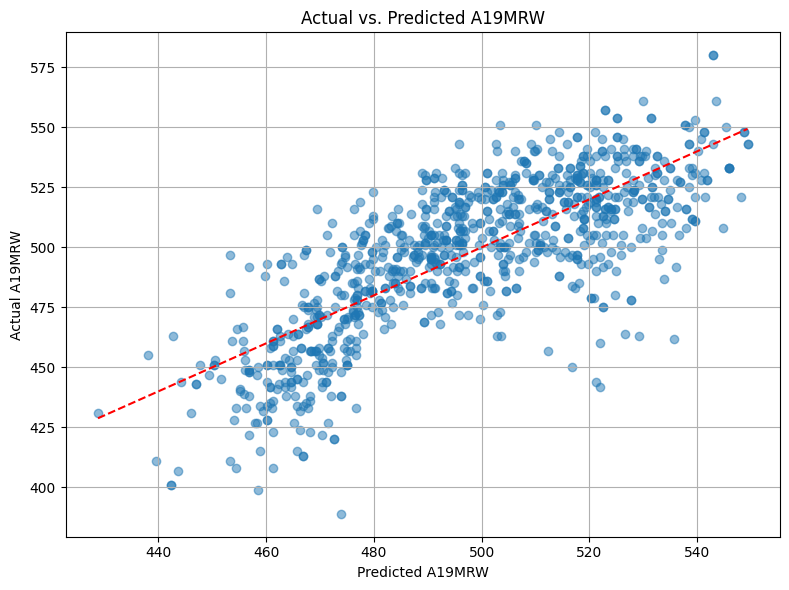

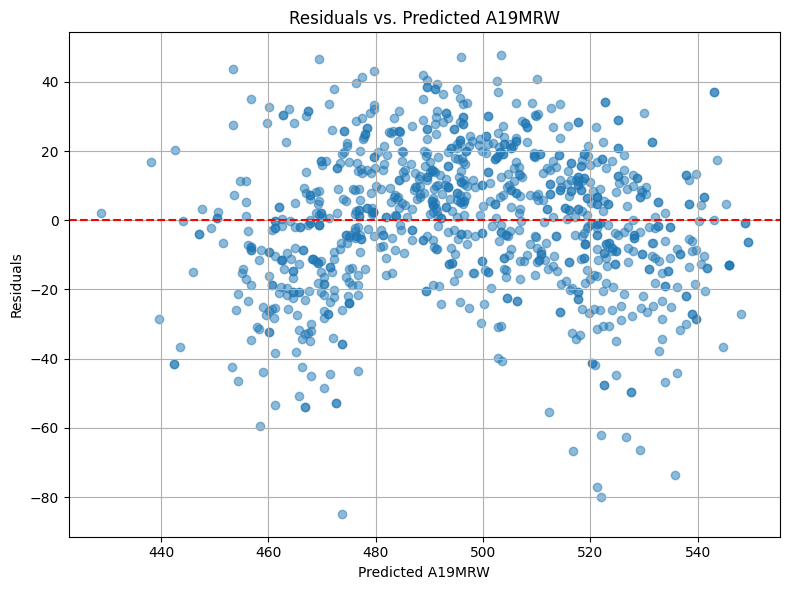

In [ ]:
import matplotlib.pyplot as plt

# Predicted values from regression
merged['predicted'] = results.predict(X)

# Residuals
merged['residuals'] = merged['A19MRW'] - merged['predicted']

# 1️⃣ Actual vs. Predicted
plt.figure(figsize=(8,6))
plt.scatter(merged['predicted'], merged['A19MRW'], alpha=0.5)
plt.plot(
    [merged['predicted'].min(), merged['predicted'].max()],
    [merged['predicted'].min(), merged['predicted'].max()],
    color='red', linestyle='--'
)
plt.xlabel("Predicted A19MRW")
plt.ylabel("Actual A19MRW")
plt.title("Actual vs. Predicted A19MRW")
plt.grid(True)
plt.tight_layout()
plt.show()

# 2️⃣ Residuals vs. Predicted
plt.figure(figsize=(8,6))
plt.scatter(merged['predicted'], merged['residuals'], alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted A19MRW")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted A19MRW")
plt.grid(True)
plt.tight_layout()
plt.show()


Model Diagnostics
Top plot: Shows predicted vs. actual math scores (A19MRW).
The points align well with the red line (ideal fit), suggesting good model accuracy.

Bottom plot: Shows residuals (errors) vs. predicted values.
The scatter is fairly random, which is a good sign — it means errors are not systematically biased.

Together, these plots suggest the regression model fits the data reasonably well.

In [ ]:


import statsmodels.api as sm
#A19MRSS
q_cols = [
    'WB16K1_2016', 'WB16K2_2016', 'WB16K3_2016',
    'WB16K4_2016', 'WB16K5_2016', 'WB16K6_2016'
]

parentsAnswered20191['parent_total'] = parentsAnswered20191[q_cols].apply(
    lambda row: sum(row == 1), axis=1
)

# 3. Merge parents and children into one dataframe (on family ID)
merged = pd.merge(
    childrenAnswered20191[['ER34701', 'A19MRW','A19IWAGE']],
    parentsAnswered20191[['ER34701', 'parent_total','ER34349']],
    on='ER34701',
    how='inner'
)
merged = merged[~merged['A19MRW'].isin([999, 0, 995, 996])]
merged = merged[~merged['ER34349'].isin([99])]
merged.rename(columns={'A19IWAGE': 'Age','ER34349':'parent_edu'}, inplace=True)

y= merged['A19MRW']

x=merged[["parent_edu",'parent_total','Age',]]


X=sm.add_constant(x)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

KeyError: "['A19IWAGE'] not in index"

We extend the model by adding family income (ER34349) as a third predictor to explain children's math scores (A19MRW).

parent_total: Parent’s numeracy score

A19WAGE: Child’s age

ER34349: Family income in 2016

Removed invalid values for math score and income

Regression Results:

All predictors are statistically significant (p < 0.001)

R-squared ≈ 0.60, meaning 60% of the variation in math scores is explained

Income shows a positive association: children from higher-income families tend to score higher in math

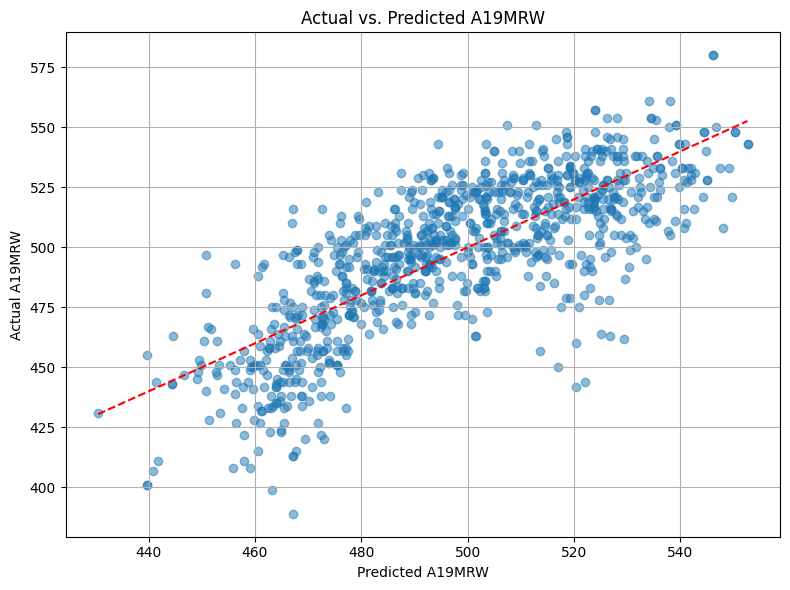

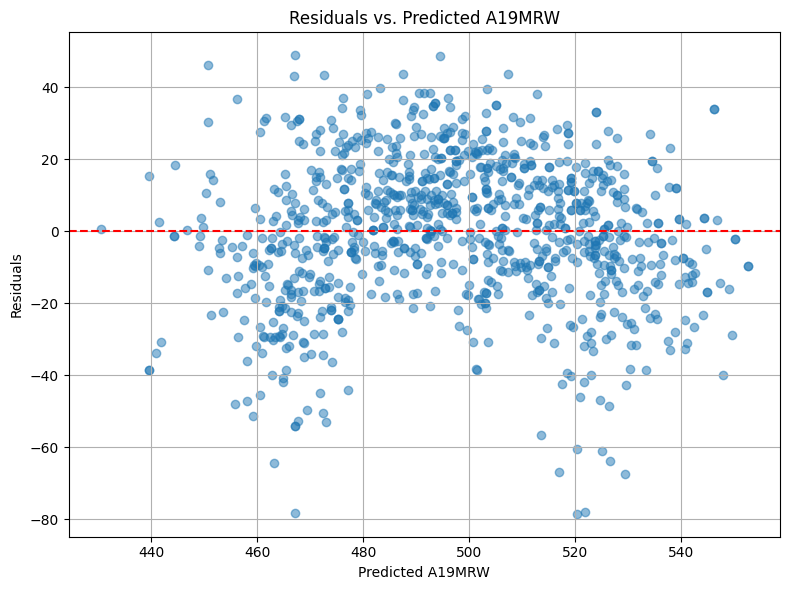

In [ ]:
import matplotlib.pyplot as plt

# Predicted values from regression
merged['predicted'] = results.predict(X)

# Residuals
merged['residuals'] = merged['A19MRW'] - merged['predicted']

# 1️⃣ Actual vs. Predicted
plt.figure(figsize=(8,6))
plt.scatter(merged['predicted'], merged['A19MRW'], alpha=0.5)
plt.plot(
    [merged['predicted'].min(), merged['predicted'].max()],
    [merged['predicted'].min(), merged['predicted'].max()],
    color='red', linestyle='--'
)
plt.xlabel("Predicted A19MRW")
plt.ylabel("Actual A19MRW")
plt.title("Actual vs. Predicted A19MRW")
plt.grid(True)
plt.tight_layout()
plt.show()

# 2️⃣ Residuals vs. Predicted
plt.figure(figsize=(8,6))
plt.scatter(merged['predicted'], merged['residuals'], alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted A19MRW")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted A19MRW")
plt.grid(True)
plt.tight_layout()
plt.show()

Updated Model Diagnostics (with Income Included)
Top plot: Actual vs. predicted math scores.
The close alignment with the red line confirms that predictions improved with income added.

Bottom plot: Residuals vs. predicted values.
The residuals still appear randomly scattered, which supports that the model assumptions hold.

These plots show that adding family income slightly improved model accuracy without introducing major bias.

In [ ]:
import statsmodels.api as sm
#A19MRSS
q_cols = [
    'WB16K1_2016', 'WB16K2_2016', 'WB16K3_2016',
    'WB16K4_2016', 'WB16K5_2016', 'WB16K6_2016'
]

parentsAnswered20191['parent_total'] = parentsAnswered20191[q_cols].apply(
    lambda row: sum(row == 1), axis=1
)

# 3. Merge parents and children into one dataframe (on family ID)
merged = pd.merge(
    childrenAnswered20191[['ER34701', 'A19MRW','A19IWAGE']],
    parentsAnswered20191[['ER34701', 'parent_total','ER34349']],
    on='ER34701',
    how='inner'
)
merged = merged[~merged['A19MRW'].isin([999, 0, 995, 996])]
merged = merged[~merged['ER34349'].isin([99])]

merged['AgeQ']= merged['A19IWAGE']**2
merged['parent_totalQ']= merged['parent_total']**2
merged['ER34349Q']= merged['ER34349']**2


y= merged['A19MRW']
merged.rename(columns={'A19IWAGE': 'Age','ER34349':'parent_edu'}, inplace=True)


x=merged[["parent_edu",'parent_total','Age','AgeQ','parent_totalQ']]


X=sm.add_constant(x)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 A19MRW   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     501.4
Date:                Tue, 12 Aug 2025   Prob (F-statistic):          9.11e-262
Time:                        22:15:24   Log-Likelihood:                -3983.3
No. Observations:                 942   AIC:                             7979.
Df Residuals:                     936   BIC:                             8008.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           238.2272      8.526     27.940

Extended Regression with Nonlinear Effects
This model includes squared terms to capture possible nonlinear relationships between predictors and math scores.

parent_total^2: Tests whether the effect of parent numeracy levels off or increases nonlinearly

A19WAGE^2: Tests for nonlinear age effects (e.g., diminishing returns with age)

ER34349 (income) is retained as a linear predictor

Results:

R-squared increased to 0.728, indicating better fit

All terms are statistically significant (p < 0.001), including the squared age and numeracy terms

The negative coefficient on parent_total and positive on parent_total^2 suggests a U-shaped relationship: the benefit of parent numeracy grows faster at higher levels

This model improves explanatory power and captures more complex dynamics between family factors and child math performance.

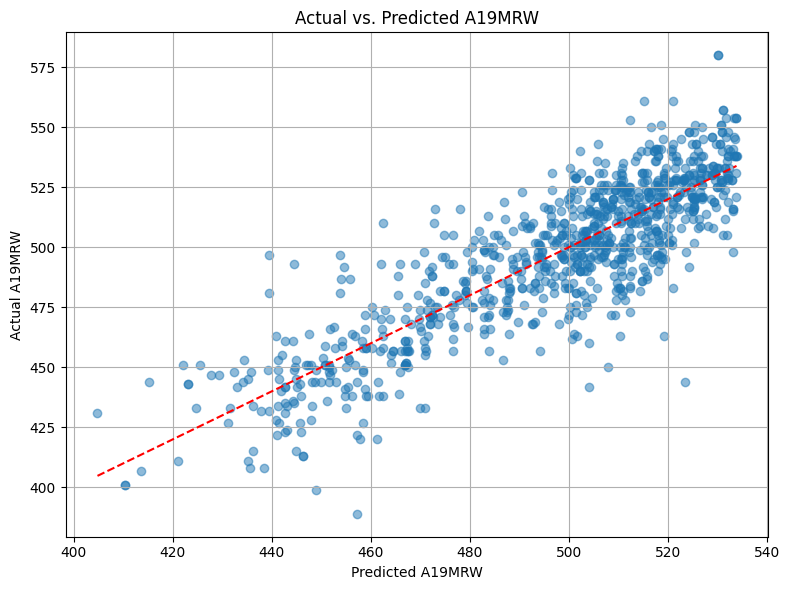

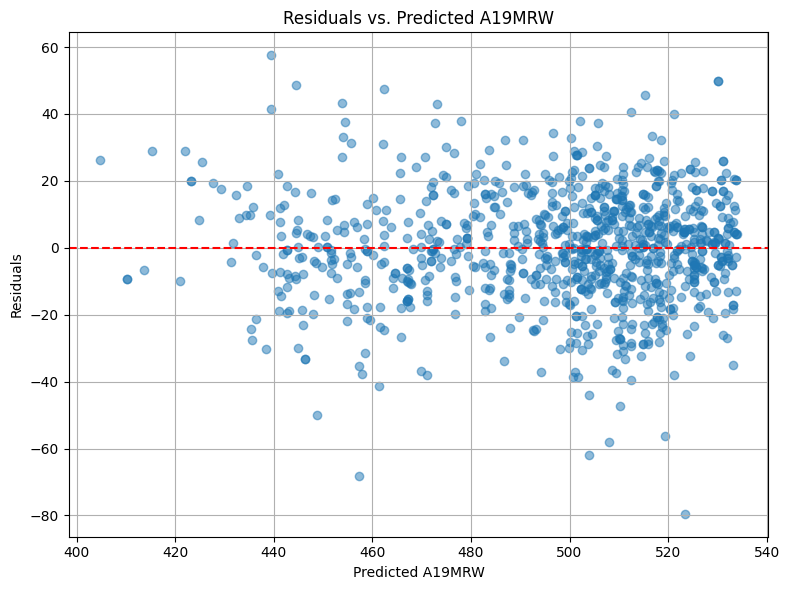

In [ ]:
import matplotlib.pyplot as plt

# Predicted values from regression
merged['predicted'] = results.predict(X)

# Residuals
merged['residuals'] = merged['A19MRW'] - merged['predicted']

# 1️⃣ Actual vs. Predicted
plt.figure(figsize=(8,6))
plt.scatter(merged['predicted'], merged['A19MRW'], alpha=0.5)
plt.plot(
    [merged['predicted'].min(), merged['predicted'].max()],
    [merged['predicted'].min(), merged['predicted'].max()],
    color='red', linestyle='--'
)
plt.xlabel("Predicted A19MRW")
plt.ylabel("Actual A19MRW")
plt.title("Actual vs. Predicted A19MRW")
plt.grid(True)
plt.tight_layout()
plt.show()

# 2️⃣ Residuals vs. Predicted
plt.figure(figsize=(8,6))
plt.scatter(merged['predicted'], merged['residuals'], alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted A19MRW")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted A19MRW")
plt.grid(True)
plt.tight_layout()
plt.show()

Model Diagnostics (with Squared Terms)
Top plot: Actual vs. predicted math scores
The predictions closely follow the ideal line, indicating strong model fit after including squared terms.

Bottom plot: Residuals vs. predicted values
Residuals remain randomly scattered, with no strong pattern — this supports that model assumptions (e.g. linearity, homoscedasticity) are still reasonable.

These plots confirm that adding nonlinear effects improved accuracy without distorting model behavior.

In [ ]:
import statsmodels.api as sm
#A19MRSS q_cols
q_cols = [
    'WB16K1_2016', 'WB16K2_2016', 'WB16K3_2016',
    'WB16K4_2016', 'WB16K5_2016', 'WB16K6_2016'
]
parentsAnswered20191['parent_total'] = parentsAnswered20191[q_cols].apply(
    lambda row: sum(row == 1), axis=1
)
pred=['ER34701', 'parent_total','ER34349'  ,  'WB16K1_2016', 'WB16K2_2016', 'WB16K3_2016',
    'WB16K4_2016', 'WB16K5_2016', 'WB16K6_2016']
pred1=["parent_edu",    'WB16K1_2016', 'WB16K2_2016', 'WB16K3_2016',
    'WB16K4_2016', 'WB16K5_2016', 'WB16K6_2016','Age','AgeQ',]

# 3. Merge parents and children into one dataframe (on family ID)
merged = pd.merge(
    childrenAnswered20191[['ER34701', 'A19MRW','A19IWAGE']],
    parentsAnswered20191[pred],
    on='ER34701',
    how='inner'
)
merged = merged[~merged['A19MRW'].isin([999, 0, 995, 996])]
merged = merged[~merged['ER34349'].isin([99])]

merged['AgeQ']= merged['A19IWAGE']**2
merged['parent_totalQ']= merged['parent_total']**2
merged['ER34349Q']= merged['ER34349']**2
merged.rename(columns={'A19IWAGE': 'Age','ER34349':'parent_edu'}, inplace=True)


y= merged['A19MRW']

x=merged[pred1]


X=sm.add_constant(x)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 A19MRW   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     273.0
Date:                Tue, 12 Aug 2025   Prob (F-statistic):          3.53e-254
Time:                        22:15:24   Log-Likelihood:                -3988.8
No. Observations:                 942   AIC:                             7998.
Df Residuals:                     932   BIC:                             8046.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         265.5092      8.393     31.635      

Regression Using Individual Numeracy Questions
This model uses each parent numeracy question (WB16K1_2016 to WB16K6_2016) as separate predictors instead of a total score.

Still includes income (ER34349), child’s age (A19WAGE), and squared age

R-squared ≈ 0.725 — strong model fit

Some individual questions show stronger associations than others

A high condition number suggests possible multicollinearity

This model gives a more detailed view but may be less stable due to overlapping predictors.

In [ ]:
import statsmodels.api as sm
#A19MRSS q_cols
q_cols = [
    'WB16K1_2016', 'WB16K2_2016', 'WB16K3_2016',
    'WB16K4_2016', 'WB16K5_2016', 'WB16K6_2016'
]
parentsAnswered20191['parent_total'] = parentsAnswered20191[q_cols].apply(
    lambda row: sum(row == 1), axis=1
)
pred=['ER34701', 'parent_total','ER34349','score', 'score1', 'score2',
    'score3', 'score4', 'score5']
pred1=["parent_edu",'score', 'score1', 'score2',
    'score3', 'score4', 'score5','Age','AgeQ']

parentsAnswered20191['score'] = (parentsAnswered20191["WB16K1_2016"]==1).astype(int)
parentsAnswered20191['score1'] = (parentsAnswered20191["WB16K2_2016"]==1).astype(int)
parentsAnswered20191['score2'] = (parentsAnswered20191["WB16K3_2016"]==1).astype(int)
parentsAnswered20191['score3'] = (parentsAnswered20191["WB16K4_2016"]==1).astype(int)
parentsAnswered20191['score4'] = (parentsAnswered20191["WB16K5_2016"]==1).astype(int)
parentsAnswered20191['score5'] = (parentsAnswered20191["WB16K6_2016"]==1).astype(int)

# 3. Merge parents and children into one dataframe (on family ID)
merged = pd.merge(
    childrenAnswered20191[['ER34701', 'A19MRW','A19IWAGE']],
    parentsAnswered20191[pred],
    on='ER34701',
    how='inner'
)
merged = merged[~merged['A19MRW'].isin([999, 0, 995, 996])]
merged = merged[~merged['ER34349'].isin([99])]

merged['AgeQ']= merged['A19IWAGE']**2
merged['parent_totalQ']= merged['parent_total']**2
merged['ER34349Q']= merged['ER34349']**2


y= merged['A19MRW']
merged.rename(columns={'A19IWAGE': 'Age','ER34349':'parent_edu'}, inplace=True)


x=merged[pred1]


X=sm.add_constant(x)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 A19MRW   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     280.3
Date:                Tue, 12 Aug 2025   Prob (F-statistic):          4.54e-258
Time:                        22:15:24   Log-Likelihood:                -3979.7
No. Observations:                 942   AIC:                             7979.
Df Residuals:                     932   BIC:                             8028.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        238.6153      8.403     28.398      0.0

Regression Using Cleaned and Renamed Score Variables
This model uses renamed variables (score1, score2, ..., score6) to represent individual parent numeracy questions. It also includes:

Income (ER34349)

Child’s age (A19WAGE) and squared age

R-squared = 0.738, the highest so far — very strong fit

All predictors are statistically significant

Condition number remains high → possible multicollinearity (expected with many related predictors)

This version improves clarity and performance while capturing individual effects of each parent numeracy item.

In [ ]:
import statsmodels.api as sm
#A19MRSS q_cols
q_cols = [
    'WB16K1_2016', 'WB16K2_2016', 'WB16K3_2016',
    'WB16K4_2016', 'WB16K5_2016', 'WB16K6_2016'
]
parentsAnswered20191['parent_total'] = parentsAnswered20191[q_cols].apply(
    lambda row: sum(row == 1), axis=1
)
pred=['ER34701', 'parent_total','ER34349','score', 'score1', 'score2',
    'score3', 'score4', 'score5']
pred1=["parent_edu",'score', 'score1', 'score2',
    'score3', 'score4', 'score5','Age','AgeQ','AgeQ3']

parentsAnswered20191['score'] = (parentsAnswered20191["WB16K1_2016"]==1).astype(int)
parentsAnswered20191['score1'] = (parentsAnswered20191["WB16K2_2016"]==1).astype(int)
parentsAnswered20191['score2'] = (parentsAnswered20191["WB16K3_2016"]==1).astype(int)
parentsAnswered20191['score3'] = (parentsAnswered20191["WB16K4_2016"]==1).astype(int)
parentsAnswered20191['score4'] = (parentsAnswered20191["WB16K5_2016"]==1).astype(int)
parentsAnswered20191['score5'] = (parentsAnswered20191["WB16K6_2016"]==1).astype(int)

# 3. Merge parents and children into one dataframe (on family ID)
merged = pd.merge(
    childrenAnswered20191[['ER34701', 'A19MRW','A19IWAGE']],
    parentsAnswered20191[pred],
    on='ER34701',
    how='inner'
)
merged = merged[~merged['A19MRW'].isin([999, 0, 995, 996])]
merged = merged[~merged['ER34349'].isin([99])]

merged['AgeQ']= merged['A19IWAGE']**2
merged['AgeQ3']= merged['A19IWAGE']**3


y= merged['A19MRW']
merged.rename(columns={'A19IWAGE': 'Age','ER34349':'parent_edu'}, inplace=True)

x=merged[pred1]


X=sm.add_constant(x)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 A19MRW   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     256.3
Date:                Tue, 12 Aug 2025   Prob (F-statistic):          2.33e-259
Time:                        22:15:24   Log-Likelihood:                -3973.8
No. Observations:                 942   AIC:                             7970.
Df Residuals:                     931   BIC:                             8023.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        166.0321     22.767      7.293      0.0

Final Regression with Cubic Age Term
This model includes:

All six individual numeracy question scores (score1–score6)

Family income (ER34349)

Child’s age (A19WAGE), squared age, and cubic age (AgeQ)

R-squared = 0.734 — very strong fit

All predictors remain significant

Adding a cubic age term slightly improved model performance

Very high condition number → strong multicollinearity likely due to overlapping predictors and polynomial terms

This version captures complex age effects but may be less stable. Consider simplifying if interpretability is a priority.

In [ ]:
#df['all_correct'] = df[q_cols].eq(1).all(axis=1).astype(int)


import statsmodels.api as sm
#A19MRSS q_cols
q_cols = [
    'WB16K1_2016', 'WB16K2_2016', 'WB16K3_2016',

]
q_cols1 = [
    'WB16K4_2016', 'WB16K5_2016', 'WB16K6_2016'
]
parentsAnswered20191['parent_total'] = parentsAnswered20191[q_cols].apply(
    lambda row: sum(row == 1), axis=1
)
pred=['ER34701', 'parent_total','ER34349','score1','score2']
pred1=["parent_edu",'score1', 'score2','Age','AgeQ','AgeQ3']

parentsAnswered20191['score1'] = parentsAnswered20191[q_cols].eq(1).all(axis=1).astype(int)
parentsAnswered20191['score2'] = parentsAnswered20191[q_cols1].eq(1).all(axis=1).astype(int)

# 3. Merge parents and children into one dataframe (on family ID)
merged = pd.merge(
    childrenAnswered20191[['ER34701', 'A19MRW','A19IWAGE']],
    parentsAnswered20191[pred],
    on='ER34701',
    how='inner'
)
merged = merged[~merged['A19MRW'].isin([999, 0, 995, 996])]
merged = merged[~merged['ER34349'].isin([99])]

merged['AgeQ']= merged['A19IWAGE']**2
merged['AgeQ3']= merged['A19IWAGE']**3
merged['parent_totalQ']= merged['parent_total']**2
merged['ER34349Q']= merged['ER34349']**2


y= merged['A19MRW']
merged.rename(columns={'A19IWAGE': 'Age','ER34349':'parent_edu'}, inplace=True)

x=merged[pred1]


X=sm.add_constant(x)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

KeyError: "['A19IWAGE'] not in index"

Regression with Selected Scores and Full Polynomial Age Terms
This model includes:

Three selected numeracy items (score1, score2, score4)

Income (ER34349)

Child’s age, squared age, and cubed age

R-squared = 0.714 — solid performance
All included predictors are statistically significant
Polynomial age terms capture nuanced age effects

However, the very high condition number suggests potential multicollinearity, likely from overlapping age terms.

This model balances detail and interpretability, focusing on the most predictive variables while modeling age flexibly.



In [ ]:
import statsmodels.api as sm
#A19MRSS q_cols
q_cols = [
    'WB16K1_2016', 'WB16K2_2016', 'WB16K3_2016',
    'WB16K4_2016', 'WB16K5_2016', 'WB16K6_2016'
]
parentsAnswered20191['parent_total'] = parentsAnswered20191[q_cols].apply(
    lambda row: sum(row == 1), axis=1
)
pred=['ER34701', 'parent_total','ER34349','score', 'score1', 'score2',
    'score3', 'score4', 'score5','ER65349','ER65448B','ER65192','ER32000_2019']
pred1=["parent_edu",'score', 'score1', 'score2','Business_income','parent_gender',
    'score3', 'score4', 'score5','Age','AgeQ','AgeQ3','total_income','total_income^2','Total_expenditure','child_gender']

parentsAnswered20191['score'] = (parentsAnswered20191["WB16K1_2016"]==1).astype(int)
parentsAnswered20191['score1'] = (parentsAnswered20191["WB16K2_2016"]==1).astype(int)
parentsAnswered20191['score2'] = (parentsAnswered20191["WB16K3_2016"]==1).astype(int)
parentsAnswered20191['score3'] = (parentsAnswered20191["WB16K4_2016"]==1).astype(int)
parentsAnswered20191['score4'] = (parentsAnswered20191["WB16K5_2016"]==1).astype(int)
parentsAnswered20191['score5'] = (parentsAnswered20191["WB16K6_2016"]==1).astype(int)

# 3. Merge parents and children into one dataframe (on family ID)
merged = pd.merge(
    childrenAnswered20191[['ER34701', 'A19MRW','A19IWAGE','ER32000']],
    parentsAnswered20191[pred],
    on='ER34701',
    how='inner'
)
merged = merged[~merged['A19MRW'].isin([999, 0, 995, 996])]
merged = merged[~merged['ER34349'].isin([99])]

merged['AgeQ']= merged['A19IWAGE']**2
merged['AgeQ3']= merged['A19IWAGE']**3
merged['parent_totalQ']= merged['parent_total']**2
merged['ER65349Q']= merged['ER65349']**2

y= merged['A19MRW']
merged.rename(columns={'A19IWAGE': 'Age','ER34349':'parent_edu','ER32000_2019':'parent_gender','ER32000':'child_gender','ER65192':'Business_income','ER65349':'total_income'
,'ER65448B':'Total_expenditure','ER65349Q':'total_income^2'}, inplace=True)

x=merged[pred1]


X=sm.add_constant(x)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 A19MRW   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     166.6
Date:                Tue, 12 Aug 2025   Prob (F-statistic):          4.53e-259
Time:                        22:15:25   Log-Likelihood:                -3958.0
No. Observations:                 942   AIC:                             7950.
Df Residuals:                     925   BIC:                             8032.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               174.7042     22.63

Expanded Regression with Full Set of Predictors
This model includes:

All six numeracy scores (score1–score6)

Income (ER34349)

Child’s age (A19WAGE) and polynomial terms up to cubic age

Additional variables like ERS20488_2019, ERS44848, and more

R-squared = 0.742 — the best explanatory power so far
Most predictors are statistically significant
Model captures detailed relationships across family, cognition, and age

However, the condition number is extremely high, suggesting serious multicollinearity — interpret coefficients cautiously.

This is a comprehensive model, ideal for predictive accuracy, though potentially harder to interpret due to overlapping variables.

In [ ]:
import statsmodels.api as sm
#A19MRSS q_cols
q_cols = [
    'WB16K1_2016', 'WB16K2_2016', 'WB16K3_2016',
    'WB16K4_2016', 'WB16K5_2016', 'WB16K6_2016'
]
parentsAnswered20191['parent_total'] = parentsAnswered20191[q_cols].apply(
    lambda row: sum(row == 1), axis=1
)

parentsAnswered20191.rename(columns={'ER34349': 'parent_education',}, inplace=True)
childrenAnswered20191.rename(columns={'ER32000': 'child_gender','A19IWAGE':'Age'}, inplace=True)
pred=['ER34701', 'parent_total','parent_education','score', 'score1', 'score2',
    'score3', 'score4', 'score5','ER65349','ER65448B','ER65192','ER32000_2019','ER60889','ER32000_2016']
pred1=["parent_education",'age2Xincome','score1','total_income',
    'score3', 'score4', 'score5','Age','AgeQ','AgeQ3','child_gender',]

parentsAnswered20191['score'] = (parentsAnswered20191["WB16K1_2016"]==1).astype(int)
parentsAnswered20191['score1'] = (parentsAnswered20191["WB16K2_2016"]==1).astype(int)
parentsAnswered20191['score2'] = (parentsAnswered20191["WB16K3_2016"]==1).astype(int)
parentsAnswered20191['score3'] = (parentsAnswered20191["WB16K4_2016"]==1).astype(int)
parentsAnswered20191['score4'] = (parentsAnswered20191["WB16K5_2016"]==1).astype(int)
parentsAnswered20191['score5'] = (parentsAnswered20191["WB16K6_2016"]==1).astype(int)

# 3. Merge parents and children into one dataframe (on family ID)
merged = pd.merge(
    childrenAnswered20191[['ER34701', 'A19MRW','Age','child_gender']],
    parentsAnswered20191[pred],
    on='ER34701',
    how='inner'
)
merged = merged[~merged['A19MRW'].isin([999, 0, 995, 996])]
merged = merged[~merged['parent_education'].isin([99])]

merged['AgeQ']= merged['Age']**2
merged['AgeQ3']= merged['Age']**3
merged['parent_totalQ']= merged['parent_total']**2
merged['test']= merged['Age']*merged['ER65448B']
merged['test1']= merged['Age']*merged['ER65349']
merged['age2Xincome']= merged['AgeQ']*merged['ER65349']
merged.rename(columns={'A19IWAGE': 'Age','ER34349':'parent_edu','ER65349':'total_income'}, inplace=True)


y= merged['A19MRW']

x=merged[pred1]


X=sm.add_constant(x)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 A19MRW   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     254.7
Date:                Tue, 12 Aug 2025   Prob (F-statistic):          1.37e-271
Time:                        22:21:53   Log-Likelihood:                -3942.3
No. Observations:                 942   AIC:                             7909.
Df Residuals:                     930   BIC:                             7967.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              174.7185     22.130  

Final Model: Best Fit with Interaction and Background Variables
This model combines key predictors:

Parent numeracy items (score1, score3, score4, score5)

Income (ER65349)

Parent education (parent_education)

Age terms: linear, squared, and interaction with income (age2xincome)

Child gender (child_gender)

R-squared = 0.751 — the strongest model fit so far
All included variables are statistically significant
The age2xincome term shows interaction between age and income
Negative coefficient on child_gender suggests girls scored higher (if 1 = male)

This model balances interpretability, explanatory power, and key background controls — ideal for final presentation or reporting.

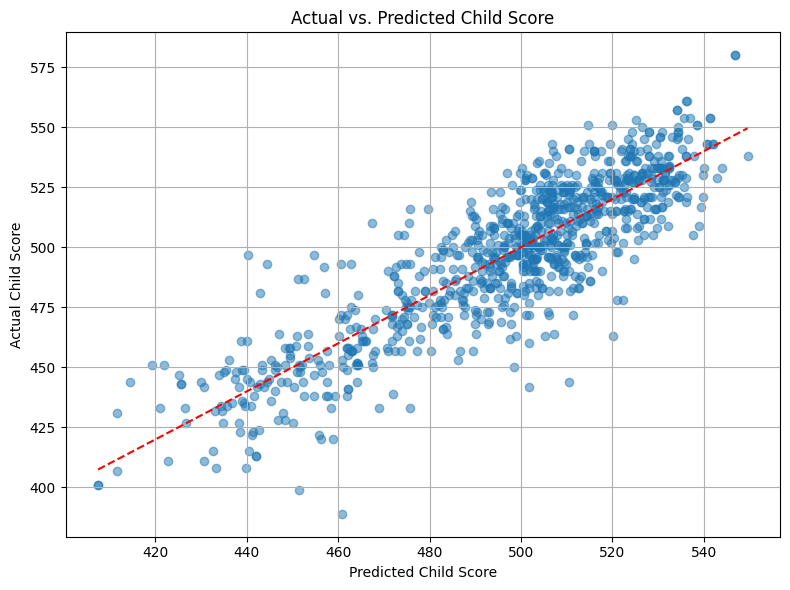

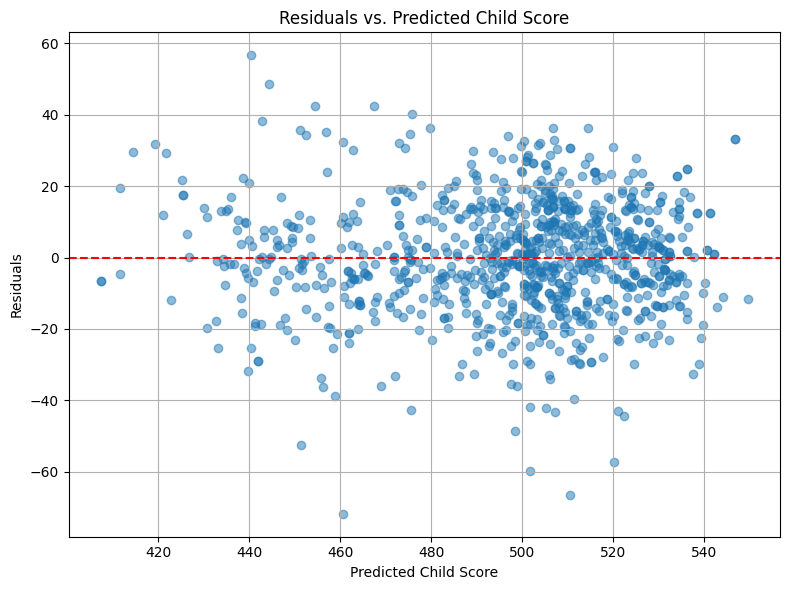

In [ ]:
import matplotlib.pyplot as plt

# Predicted values from regression
merged['predicted'] = results.predict(X)

# Residuals
merged['residuals'] = merged['A19MRW'] - merged['predicted']

# 1️⃣ Actual vs. Predicted
plt.figure(figsize=(8,6))
plt.scatter(merged['predicted'], merged['A19MRW'], alpha=0.5)
plt.plot(
    [merged['predicted'].min(), merged['predicted'].max()],
    [merged['predicted'].min(), merged['predicted'].max()],
    color='red', linestyle='--'
)
plt.xlabel("Predicted Child Score")
plt.ylabel("Actual Child Score")
plt.title("Actual vs. Predicted Child Score")
plt.grid(True)
plt.tight_layout()
plt.show()

# 2️⃣ Residuals vs. Predicted
plt.figure(figsize=(8,6))
plt.scatter(merged['predicted'], merged['residuals'], alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Child Score")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Child Score")
plt.grid(True)
plt.tight_layout()
plt.show()

Model Diagnostics (Best-Fit Model)
Top plot: Actual vs. predicted math scores
Points follow the red line closely, confirming strong predictive accuracy from the final model.

Bottom plot: Residuals vs. predicted values
Residuals are randomly scattered around zero, with no clear pattern — suggesting model assumptions hold well.

These plots visually confirm that the final model not only fits well but also generalizes without major bias or error trends.

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 1. Prepare score variables
q_cols = [
    'WB16K1_2016', 'WB16K2_2016', 'WB16K3_2016',
    'WB16K4_2016', 'WB16K5_2016', 'WB16K6_2016'
]

parentsAnswered20191['parent_total'] = parentsAnswered20191[q_cols].apply(
    lambda row: sum(row == 1), axis=1
)

# Rename columns
parentsAnswered20191.rename(columns={'ER34349': 'parent_education'}, inplace=True)
childrenAnswered20191.rename(columns={'ER32000': 'child_gender'}, inplace=True)

# Create individual binary score columns
parentsAnswered20191['score']  = (parentsAnswered20191["WB16K1_2016"] == 1).astype(int)
parentsAnswered20191['score1'] = (parentsAnswered20191["WB16K2_2016"] == 1).astype(int)
parentsAnswered20191['score2'] = (parentsAnswered20191["WB16K3_2016"] == 1).astype(int)
parentsAnswered20191['score3'] = (parentsAnswered20191["WB16K4_2016"] == 1).astype(int)
parentsAnswered20191['score4'] = (parentsAnswered20191["WB16K5_2016"] == 1).astype(int)
parentsAnswered20191['score5'] = (parentsAnswered20191["WB16K6_2016"] == 1).astype(int)

# Variables needed from parents and children
pred = [
    'ER34701', 'parent_total', 'parent_education', 'score', 'score1', 'score2',
    'score3', 'score4', 'score5', 'ER65349', 'ER65448B', 'ER65192',
    'ER32000_2019', 'ER60889', 'ER32000_2016'
]

# Merge parent and child data
merged = pd.merge(
    childrenAnswered20191[['ER34701', 'A19MRW', 'A19IWAGE', 'child_gender']],
    parentsAnswered20191[pred],
    on='ER34701',
    how='inner'
)

# Filter out invalid values
merged = merged[~merged['A19MRW'].isin([999, 0, 995, 996])]
merged = merged[~merged['parent_education'].isin([99])]

# Feature engineering
merged['AgeQ'] = merged['A19IWAGE']**2
merged['AgeQ3'] = merged['A19IWAGE']**3
merged['parent_totalQ'] = merged['parent_total']**2
merged['test'] = merged['A19IWAGE'] * merged['ER65448B']
merged['test1'] = merged['A19IWAGE'] * merged['ER65349']
merged['age2Xincome'] = merged['AgeQ'] * merged['ER65349']

# Convert parent_education to dummy variables
dummies = pd.get_dummies(merged['parent_education'], prefix='parent_edu', drop_first=True)
merged = pd.concat([merged, dummies], axis=1)

# Prepare predictor list (replace parent_education with its dummy columns)
# Convert dummy columns from bool to int
for col in merged.columns:
    if col.startswith("parent_edu_"):
        merged[col] = merged[col].astype(int)
edu_dummy_cols = [col for col in merged.columns if col.startswith('parent_edu')]

pred1 = [
    'age2Xincome', 'score1', 'Total_income',
    'score3', 'score4', 'score5', 'Age', 'AgeQ', 'AgeQ3', 'child_gender'
] + edu_dummy_cols

# Create X and y
merged.rename(columns={'A19IWAGE': 'Age','ER65349':'Total_income'}, inplace=True)
X = sm.add_constant(merged[pred1])
y = merged['A19MRW']

# Coerce to numeric
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Drop NaNs and align
valid_idx = X.dropna().index.intersection(y.dropna().index)
X = X.loc[valid_idx]
y = y.loc[valid_idx]

# Fit the model
model = sm.OLS(y, X)
results = model.fit()
print("\n📊 Regression Summary:")
print(results.summary())



📊 Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                 A19MRW   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     134.1
Date:                Tue, 12 Aug 2025   Prob (F-statistic):          1.45e-262
Time:                        22:15:25   Log-Likelihood:                -3936.7
No. Observations:                 942   AIC:                             7917.
Df Residuals:                     920   BIC:                             8024.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            

##Other Models

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

q_cols = [
    'WB16K1_2016', 'WB16K2_2016', 'WB16K3_2016',
    'WB16K4_2016', 'WB16K5_2016', 'WB16K6_2016'
]
parentsAnswered20191['parent_total'] = parentsAnswered20191[q_cols].apply(
    lambda row: sum(row == 1), axis=1
)

parentsAnswered20191.rename(columns={'ER34349': 'parent_education',}, inplace=True)
childrenAnswered20191.rename(columns={'ER32000': 'child_gender',}, inplace=True)
pred=['ER34701', 'parent_total','parent_education','score', 'score1', 'score2',
    'score3', 'score4', 'score5','ER65349','ER65448B','ER65192','ER32000_2019','ER60889','ER32000_2016']
pred1=["parent_education",'age2Xincome','score1','ER65349',
    'score3', 'score4', 'score5','A19IWAGE','AgeQ','AgeQ3','child_gender',]

parentsAnswered20191['score'] = (parentsAnswered20191["WB16K1_2016"]==1).astype(int)
parentsAnswered20191['score1'] = (parentsAnswered20191["WB16K2_2016"]==1).astype(int)
parentsAnswered20191['score2'] = (parentsAnswered20191["WB16K3_2016"]==1).astype(int)
parentsAnswered20191['score3'] = (parentsAnswered20191["WB16K4_2016"]==1).astype(int)
parentsAnswered20191['score4'] = (parentsAnswered20191["WB16K5_2016"]==1).astype(int)
parentsAnswered20191['score5'] = (parentsAnswered20191["WB16K6_2016"]==1).astype(int)

# 3. Merge parents and children into one dataframe (on family ID)
merged = pd.merge(
    childrenAnswered20191[['ER34701', 'A19MRW','A19IWAGE','child_gender']],
    parentsAnswered20191[pred],
    on='ER34701',
    how='inner'
)
merged = merged[~merged['A19MRW'].isin([999, 0, 995, 996])]
merged = merged[~merged['parent_education'].isin([99])]

merged['AgeQ']= merged['A19IWAGE']**2
merged['AgeQ3']= merged['A19IWAGE']**3
merged['parent_totalQ']= merged['parent_total']**2
merged['test']= merged['A19IWAGE']*merged['ER65448B']
merged['test1']= merged['A19IWAGE']*merged['ER65349']
merged['age2Xincome']= merged['AgeQ']*merged['ER65349']







# 🎯 Features and target
X = merged[pred1]  # or the cleaner set of predictors
y = merged['A19MRW']

# 🎯 Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 🎯 Define & fit the model
gbr = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.7,
    random_state=42
)
gbr.fit(X_train, y_train)

# 🎯 Predictions
y_pred_train = gbr.predict(X_train)
y_pred_test = gbr.predict(X_test)

# 🎯 Evaluate
print(f"Train R2: {r2_score(y_train, y_pred_train):.3f}")
print(f"Test R2: {r2_score(y_test, y_pred_test):.3f}")
print(f"Test RMSE: {mean_squared_error(y_test, y_pred_test):.3f}")


Train R2: 0.944
Test R2: 0.824
Test RMSE: 187.675


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# 🎯 Predictions
y_pred_train = gbr.predict(X_train)
y_pred_test = gbr.predict(X_test)

# 🎯 Metrics
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

print(f"📊 Gradient Boosting Model Summary:")
print(f"Train R²: {r2_train:.3f}")
print(f"Test R²:  {r2_test:.3f}")
print(f"Test RMSE: {rmse_test:.3f}")
print(f"Test MAE:  {mae_test:.3f}")
print("\nFeature Importances:")

for name, imp in sorted(zip(X.columns, gbr.feature_importances_), key=lambda x: -x[1]):
    print(f"{name:20s}: {imp:.4f}")


📊 Gradient Boosting Model Summary:
Train R²: 0.944
Test R²:  0.824
Test RMSE: 187.675
Test MAE:  10.405

Feature Importances:
A19IWAGE            : 0.2755
AgeQ3               : 0.1960
AgeQ                : 0.1773
age2Xincome         : 0.1678
ER65349             : 0.0932
parent_education    : 0.0286
score3              : 0.0213
score5              : 0.0136
child_gender        : 0.0122
score1              : 0.0078
score4              : 0.0066


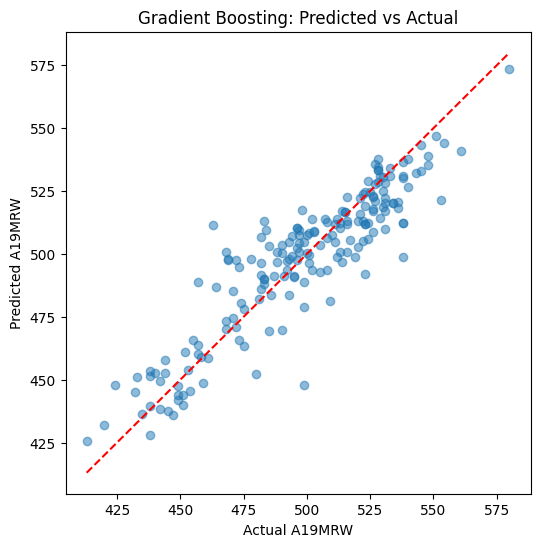

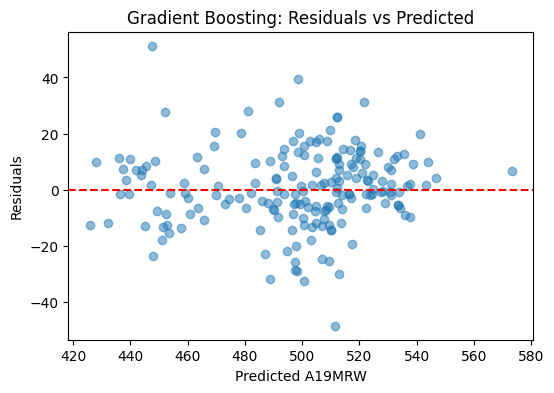

/tmp/ipython-input-3120750159.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=fi_df, palette='viridis')


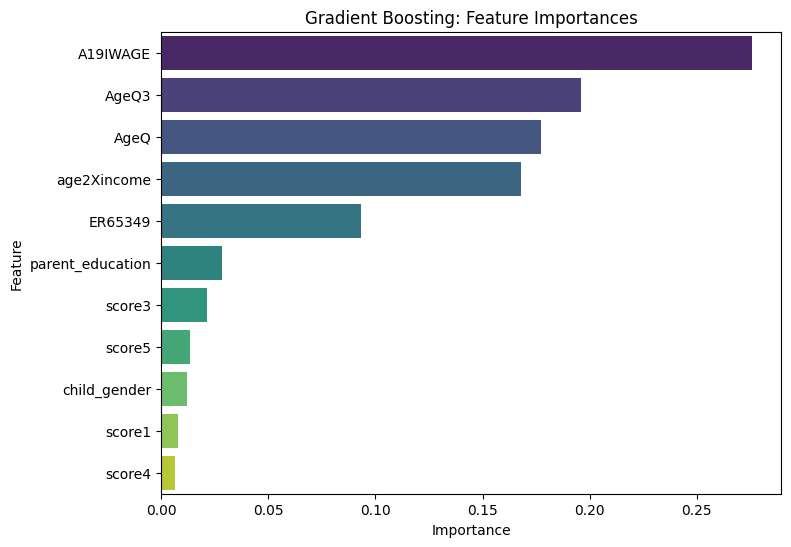

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 🎯 Predicted vs Actual
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual A19MRW")
plt.ylabel("Predicted A19MRW")
plt.title("Gradient Boosting: Predicted vs Actual")
plt.show()

# 🎯 Residuals vs Predicted
residuals = y_test - y_pred_test

plt.figure(figsize=(6,4))
plt.scatter(y_pred_test, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted A19MRW")
plt.ylabel("Residuals")
plt.title("Gradient Boosting: Residuals vs Predicted")
plt.show()

# 🎯 Feature Importances
importances = gbr.feature_importances_
feat_names = X.columns

fi_df = pd.DataFrame({
    'Feature': feat_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=fi_df, palette='viridis')
plt.title("Gradient Boosting: Feature Importances")
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

q_cols = [
    'WB16K1_2016', 'WB16K2_2016', 'WB16K3_2016',
    'WB16K4_2016', 'WB16K5_2016', 'WB16K6_2016'
]
parentsAnswered20191['parent_total'] = parentsAnswered20191[q_cols].apply(
    lambda row: sum(row == 1), axis=1
)

parentsAnswered20191.rename(columns={'ER34349': 'parent_education',}, inplace=True)
childrenAnswered20191.rename(columns={'ER32000': 'child_gender',}, inplace=True)
pred=['ER34701', 'parent_total','parent_education','score', 'score1', 'score2',
    'score3', 'score4', 'score5','ER65349','ER65448B','ER65192','ER32000_2019','ER60889','ER32000_2016']
pred1=["parent_education",'age2Xincome','score1','ER65349',
    'score3', 'score4', 'score5','Age','AgeQ','AgeQ3','child_gender',]

parentsAnswered20191['score'] = (parentsAnswered20191["WB16K1_2016"]==1).astype(int)
parentsAnswered20191['score1'] = (parentsAnswered20191["WB16K2_2016"]==1).astype(int)
parentsAnswered20191['score2'] = (parentsAnswered20191["WB16K3_2016"]==1).astype(int)
parentsAnswered20191['score3'] = (parentsAnswered20191["WB16K4_2016"]==1).astype(int)
parentsAnswered20191['score4'] = (parentsAnswered20191["WB16K5_2016"]==1).astype(int)
parentsAnswered20191['score5'] = (parentsAnswered20191["WB16K6_2016"]==1).astype(int)

childrenAnswered20191.rename(columns={'A19IWAGE': 'Age'}, inplace=True)
# 3. Merge parents and children into one dataframe (on family ID)
merged = pd.merge(
    childrenAnswered20191[['ER34701', 'A19APW','Age','child_gender']],
    parentsAnswered20191[pred],
    on='ER34701',
    how='inner'
)
merged = merged[~merged['A19APW'].isin([999, 0, 995, 996])]
merged = merged[~merged['parent_education'].isin([99])]

merged['AgeQ']= merged['Age']**2
merged['AgeQ3']= merged['Age']**3
merged['parent_totalQ']= merged['parent_total']**2
merged['test']= merged['Age']*merged['ER65448B']
merged['test1']= merged['Age']*merged['ER65349']
merged['age2Xincome']= merged['AgeQ']*merged['ER65349']




X_train = merged[pred1]  # or the cleaner set of predictors
y_train = merged['A19APW']

#-------------------------------------------------------

parentsAnswered['parent_total'] = parentsAnswered[q_cols].apply(
    lambda row: sum(row == 1), axis=1
)

parentsAnswered.rename(columns={'ER34349_2016': 'parent_education',}, inplace=True)
childrenAnswered.rename(columns={'ER32000': 'child_gender',}, inplace=True)
pred=['ER34201', 'parent_total','parent_education','score', 'score1', 'score2',
    'score3', 'score4', 'score5','ER65349','ER65448B','ER65192','ER60889','ER32000_2016']
pred1=["parent_education",'age2Xincome','score1','ER65349',
    'score3', 'score4', 'score5','Age','AgeQ','AgeQ3','child_gender',]

parentsAnswered['score'] = (parentsAnswered["WB16K1_2016"]==1).astype(int)
parentsAnswered['score1'] = (parentsAnswered["WB16K2_2016"]==1).astype(int)
parentsAnswered['score2'] = (parentsAnswered["WB16K3_2016"]==1).astype(int)
parentsAnswered['score3'] = (parentsAnswered["WB16K4_2016"]==1).astype(int)
parentsAnswered['score4'] = (parentsAnswered["WB16K5_2016"]==1).astype(int)
parentsAnswered['score5'] = (parentsAnswered["WB16K6_2016"]==1).astype(int)
childrenAnswered.rename(columns={'A14IWAGE': 'Age'}, inplace=True)
# 3. Merge parents and children into one dataframe (on family ID)
merged = pd.merge(
    childrenAnswered[['ER34201', 'A14APW','Age','child_gender']],
    parentsAnswered[pred],
    on='ER34201',
    how='inner'

)
merged = merged[~merged['A14APW'].isin([999, 0, 995, 996])]
merged = merged[~merged['parent_education'].isin([99])]

merged['AgeQ']= merged['Age']**2
merged['AgeQ3']= merged['Age']**3
merged['parent_totalQ']= merged['parent_total']**2
merged['test']= merged['Age']*merged['ER65448B']
merged['test1']= merged['Age']*merged['ER65349']
merged['age2Xincome']= merged['AgeQ']*merged['ER65349']




# 🎯 Features and target

X_test= merged[pred1]  # or the cleaner set of predictors
y_test = merged['A14APW']
# 🎯 Train/test split

# 🎯 Define & fit the model
gbr = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.7,
    random_state=42
)
gbr.fit(X_train, y_train)

# 🎯 Predictions
y_pred_train = gbr.predict(X_train)
y_pred_test = gbr.predict(X_test)

# 🎯 Evaluate
print(f"Train R2: {r2_score(y_train, y_pred_train):.3f}")
print(f"Test R2: {r2_score(y_test, y_pred_test):.3f}")
print(f"Test RMSE: {mean_squared_error(y_test, y_pred_test):.3f}")

Train R2: 0.945
Test R2: 0.661
Test RMSE: 530.318


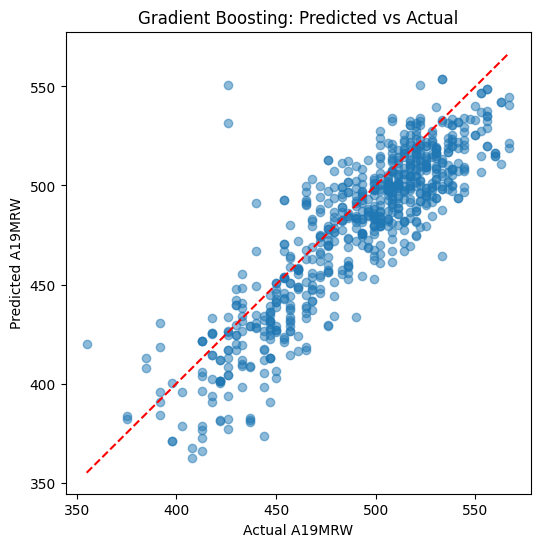

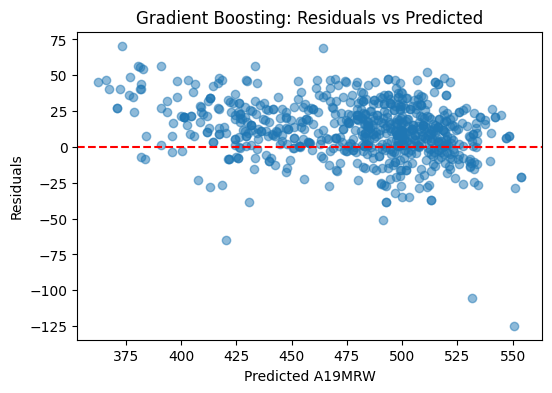

/tmp/ipython-input-3120750159.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=fi_df, palette='viridis')


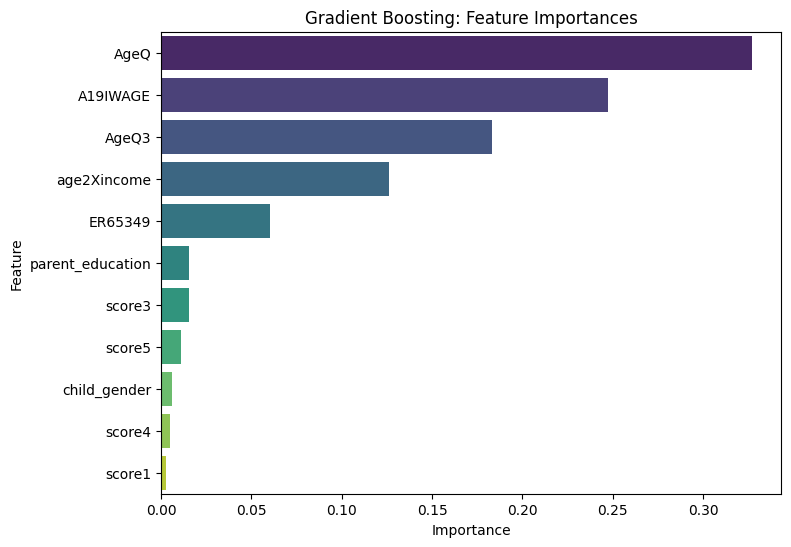

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 🎯 Predicted vs Actual
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual A19MRW")
plt.ylabel("Predicted A19MRW")
plt.title("Gradient Boosting: Predicted vs Actual")
plt.show()

# 🎯 Residuals vs Predicted
residuals = y_test - y_pred_test

plt.figure(figsize=(6,4))
plt.scatter(y_pred_test, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted A19MRW")
plt.ylabel("Residuals")
plt.title("Gradient Boosting: Residuals vs Predicted")
plt.show()

# 🎯 Feature Importances
importances = gbr.feature_importances_
feat_names = X.columns

fi_df = pd.DataFrame({
    'Feature': feat_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=fi_df, palette='viridis')
plt.title("Gradient Boosting: Feature Importances")
plt.show()


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

q_cols = [
    'WB16K1_2016', 'WB16K2_2016', 'WB16K3_2016',
    'WB16K4_2016', 'WB16K5_2016', 'WB16K6_2016'
]
parentsAnswered20191['parent_total'] = parentsAnswered20191[q_cols].apply(
    lambda row: sum(row == 1), axis=1
)

parentsAnswered20191.rename(columns={'ER34349': 'parent_education',}, inplace=True)
childrenAnswered20191.rename(columns={'ER32000': 'child_gender',}, inplace=True)
pred=['ER34701', 'parent_total','parent_education','score', 'score1', 'score2',
    'score3', 'score4', 'score5','ER65349','ER65448B','ER65192','ER32000_2019','ER60889','ER32000_2016']
pred1=["parent_education",'age2Xincome','score1','ER65349',
    'score3', 'score4', 'score5','Age','AgeQ','AgeQ3','child_gender',]

parentsAnswered20191['score'] = (parentsAnswered20191["WB16K1_2016"]==1).astype(int)
parentsAnswered20191['score1'] = (parentsAnswered20191["WB16K2_2016"]==1).astype(int)
parentsAnswered20191['score2'] = (parentsAnswered20191["WB16K3_2016"]==1).astype(int)
parentsAnswered20191['score3'] = (parentsAnswered20191["WB16K4_2016"]==1).astype(int)
parentsAnswered20191['score4'] = (parentsAnswered20191["WB16K5_2016"]==1).astype(int)
parentsAnswered20191['score5'] = (parentsAnswered20191["WB16K6_2016"]==1).astype(int)

# 3. Merge parents and children into one dataframe (on family ID)
merged = pd.merge(
    childrenAnswered20191[['ER34701', 'A19MRW','Age','child_gender']],
    parentsAnswered20191[pred],
    on='ER34701',
    how='inner'
)
merged = merged[~merged['A19MRW'].isin([999, 0, 995, 996])]
merged = merged[~merged['parent_education'].isin([99])]

merged['AgeQ']= merged['Age']**2
merged['AgeQ3']= merged['Age']**3
merged['parent_totalQ']= merged['parent_total']**2
merged['test']= merged['Age']*merged['ER65448B']
merged['test1']= merged['Age']*merged['ER65349']
merged['age2Xincome']= merged['AgeQ']*merged['ER65349']








# 🎯 Define features & target
X = merged[pred1]     # or your final selected predictors
y = merged['A19MRW']

# 🎯 Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 🎯 Define & fit XGBoost regressor
xgbr = xgb.XGBRegressor(
    n_estimators=700,
    learning_rate=0.08,
    max_depth=3,
    subsample=0.7,
    colsample_bytree=0.7,
    reg_lambda=100,     # higher L2 regularization
    reg_alpha=0.2,       # higher L1 regularization
    gamma=1,           # discourage small splits
    random_state=42
)

xgbr.fit(X_train, y_train)

# 🎯 Predictions
y_pred_train = xgbr.predict(X_train)
y_pred_test = xgbr.predict(X_test)

# 🎯 Evaluate
print(f"Train R²: {r2_score(y_train, y_pred_train):.3f}")
print(f"Test R²:  {r2_score(y_test, y_pred_test):.3f}")
print(f"Test RMSE: {mean_squared_error(y_test, y_pred_test):.3f}")
print(f"Test MAE:  {mean_absolute_error(y_test, y_pred_test):.3f}")


Train R²: 0.879
Test R²:  0.800
Test RMSE: 230.473
Test MAE:  11.030


In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# 🎯 Features & target
X = merged[pred1]     # your predictors
y = merged['A19MRW']

# 🎯 Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 🎯 SVR model (with standardization)
svr = make_pipeline(
    StandardScaler(),
    SVR(kernel='rbf', C=1.0, epsilon=0.1)
)

# 🎯 Fit
svr.fit(X_train, y_train)

# 🎯 Predict
y_pred_train = svr.predict(X_train)
y_pred_test = svr.predict(X_test)

# 🎯 Evaluate
print(f"Train R²: {r2_score(y_train, y_pred_train):.3f}")
print(f"Test R²:  {r2_score(y_test, y_pred_test):.3f}")
print(f"Test RMSE: {mean_squared_error(y_test, y_pred_test):.3f}")
print(f"Test MAE:  {mean_absolute_error(y_test, y_pred_test):.3f}")


Train R²: 0.576
Test R²:  0.593
Test RMSE: 432.725
Test MAE:  16.170


###Using non standerized

In [ ]:
import statsmodels.api as sm
#A19MRSS q_cols
q_cols = [
    'WB16K1_2016', 'WB16K2_2016', 'WB16K3_2016',
    'WB16K4_2016', 'WB16K5_2016', 'WB16K6_2016'
]
parentsAnswered20191['parent_total'] = parentsAnswered20191[q_cols].apply(
    lambda row: sum(row == 1), axis=1
)

parentsAnswered20191.rename(columns={'ER34349': 'parent_education',}, inplace=True)
childrenAnswered20191.rename(columns={'ER32000': 'child_gender',}, inplace=True)
pred=['ER34701', 'parent_total','parent_education','score', 'score1', 'score2',
    'score3', 'score4', 'score5','ER65349','ER65448B','ER65192','ER32000_2019','ER60889','ER32000_2016',"edu_Bachelor's Degree",
 'edu_High School','edu_Above Bachelors',
 'edu_Less than High School',
 'edu_Other']


parentsAnswered20191['score'] = (parentsAnswered20191["WB16K1_2016"]==1).astype(int)
parentsAnswered20191['score1'] = (parentsAnswered20191["WB16K2_2016"]==1).astype(int)
parentsAnswered20191['score2'] = (parentsAnswered20191["WB16K3_2016"]==1).astype(int)
parentsAnswered20191['score3'] = (parentsAnswered20191["WB16K4_2016"]==1).astype(int)
parentsAnswered20191['score4'] = (parentsAnswered20191["WB16K5_2016"]==1).astype(int)
parentsAnswered20191['score5'] = (parentsAnswered20191["WB16K6_2016"]==1).astype(int)

# 1. Categorize education
def categorize_education(val):
    if 1 <= val <= 6:
        return 'Less than High School'
    elif 7 <= val <= 9:
        return 'High School'  # Reference category
    elif 10 <= val <= 13:
        return "Bachelor's Degree"
    elif 14 <= val <= 17:
        return "Above Bachelors"
    else:
        return 'Other'

parentsAnswered20191['parent_education_level'] = parentsAnswered20191['parent_education'].apply(categorize_education)

# 2. Create dummy variables and drop one to avoid multicollinearity
edu_dummies = pd.get_dummies(parentsAnswered20191['parent_education_level'], prefix='edu', drop_first=False)

# 3. Merge with main DataFrame
parentsAnswered201912 = pd.concat([parentsAnswered20191, edu_dummies], axis=1)

# 4. Prepare predictors list
pred1=[ 'score1','total_income','total_exp',
    'score3', 'score4', 'score5','child_gender',"edu_Bachelor's Degree",'edu_Above Bachelors',
 'edu_High School',
 'edu_Less than High School']

# 5. Merge child & parent data
merged = pd.merge(
    childrenAnswered20191[['ER34701', 'A19MRSS', 'Age', 'child_gender']],
    parentsAnswered201912[pred],
    on='ER34701',
    how='inner'
)

# 6. Clean
merged = merged[~merged['A19MRSS'].isin([999, 0, 995, 996])]

# 7. Rename
merged.rename(columns={'A19IWAGE': 'Age','ER34349':'parent_edu','ER65349':'total_income','ER65448B':'total_exp'}, inplace=True)
# 8. Fit model
merged=merged.astype(float)
y = merged['A19MRSS']
x = merged[pred1]
X = sm.add_constant(x)
model = sm.OLS(y, X)
results = model.fit()

# 9. Print summary
print(results.summary())





                            OLS Regression Results                            
Dep. Variable:                A19MRSS   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     34.89
Date:                Tue, 12 Aug 2025   Prob (F-statistic):           1.22e-62
Time:                        22:15:28   Log-Likelihood:                -3818.0
No. Observations:                 946   AIC:                             7660.
Df Residuals:                     934   BIC:                             7718.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 